In [1]:
import warnings
warnings.filterwarnings("ignore")
import os, pandas as ps, numpy as nuy, matplotlib.pyplot as empl, random, scipy.io.wavfile as wav, seaborn
import librosa        
import librosa.display
from IPython.display import display, HTML

from sklearn import preprocessing, pipeline, model_selection, utils, decomposition, metrics
from sklearn import tree, svm, naive_bayes, ensemble, neural_network

In [2]:
def ReadDB(rvdr):
    drs=os.listdir(rvdr)
    drm,drf=[],[]
    for al in drs:
        ext=int(al.split("_")[1])
        if ext%2==0:
            drf.append(al)
        else:
            drm.append(al)
    return drf, drm

In [3]:
RavLoc="D:\\Datasets\\Speech Emotion Recognition\\RAVDESS Speech Emotion Database\\Speech Emotion\\"
#RavLoc="C:\\Users\\HenGa\\Downloads\\archive fol\\"
DrFem, DrMl=ReadDB(RavLoc)
print("Directories Include Female Speeches:",*DrFem, sep="\n")
print("\nDirectories Include Male Speeches:",*DrMl, sep="\n")

Directories Include Female Speeches:
Actor_02
Actor_04
Actor_06
Actor_08
Actor_10
Actor_12
Actor_14
Actor_16
Actor_18
Actor_20
Actor_22
Actor_24

Directories Include Male Speeches:
Actor_01
Actor_03
Actor_05
Actor_07
Actor_09
Actor_11
Actor_13
Actor_15
Actor_17
Actor_19
Actor_21
Actor_23


In [4]:
def PrepareData(rvdr, drf, drm):
    gndrlbl=[]
    fileq=[]
    filenmq=[]
    FSZ=[]
    ext=[]
    for d in range(len(drf)):
        crdf=os.path.join(rvdr,drf[d])
        crdff=os.listdir(os.path.join(rvdr,drf[d]))
        for cf in crdff:
            fileq.append(os.path.join(rvdr,os.path.join(crdf,cf)))
            gndrlbl.append("Female")
            filenmq.append(cf)
            FSZ.append(os.path.getsize(os.path.join(rvdr,os.path.join(crdf,cf))))
            ext.append(cf.split(".")[-1])
    for d in range(len(drm)):
        crdm=os.path.join(rvdr,drm[d])
        crdfm=os.listdir(os.path.join(rvdr,drm[d]))
        for cm in crdfm:
            fileq.append(os.path.join(rvdr,os.path.join(crdm,cm)))
            gndrlbl.append("Male")
            filenmq.append(cm)
            FSZ.append(os.path.getsize(os.path.join(rvdr,os.path.join(crdm,cm))))
            ext.append(cm.split(".")[-1])
    RVDT=ps.DataFrame({
        "Location":fileq,
        "File":filenmq,
        "Gender":gndrlbl,
        "File_Size":FSZ,
        "Extension":ext
    })
    return RVDT

In [5]:
emotion_data=PrepareData(RavLoc,DrFem, DrMl)
emotion_data

,Location,File,Gender,File_Size,Extension
0,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-01-01-02.wav,Female,116506,wav
1,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-01-02-02.wav,Female,115440,wav
2,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-02-01-02.wav,Female,120778,wav
3,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-02-02-02.wav,Female,115438,wav
4,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-01-01-02.wav,Female,122914,wav
...,...,...,...,...,...
1435,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-01-02-02-23.wav,Male,105830,wav
1436,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-01-01-23.wav,Male,112236,wav
1437,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-01-02-23.wav,Male,107964,wav
1438,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-02-01-23.wav,Male,106898,wav


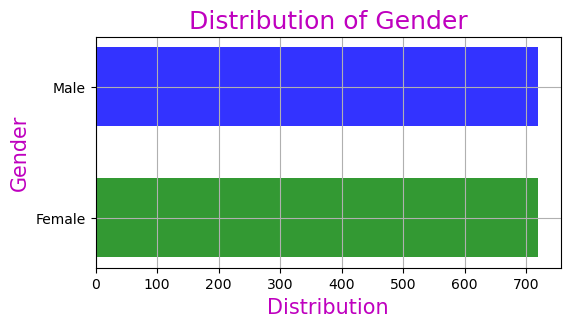

In [6]:
getdst=emotion_data.Gender.value_counts().index.tolist()
getcnt=emotion_data.Gender.value_counts().tolist()
empl.figure(figsize=(6,3))
empl.title("Distribution of Gender",fontsize=18,color="m")
empl.barh(getdst,getcnt, height=0.6,alpha=0.8,color=["g","b"])
empl.xlabel("Distribution",fontsize=15,color="m")
empl.ylabel("Gender",fontsize=15,color="m")
empl.grid()
empl.show()

In [7]:
def SpecGraph(dlc,rvdr):
    lst_fl=[os.listdir(dlc)[0],os.listdir(dlc)[10],os.listdir(dlc)[5],os.listdir(dlc)[20]]
    print(lst_fl)
    gn=["Male","Male","Female","Female"]
    clrs=["#FD349C","#FD349C","#6C2DC7","#6C2DC7"]  
    for f in range(len(lst_fl)):
        fllc=os.path.join(dlc,lst_fl[f])
        prf=os.path.join(fllc,os.listdir(fllc)[f])
        spwv, spft = wav.read(prf)
        smpl = spft.shape[0]
        empl.figure(figsize=(9,4))
        empl.title("Spectrogram for {} Speech(Sample: {}) ".format(gn[f],smpl),fontsize=20,color=clrs[f])
        empl.plot(spft,"{}".format(clrs[f]),alpha=0.6)
        empl.grid()
        empl.show()

['Actor_01', 'Actor_11', 'Actor_06', 'Actor_21']


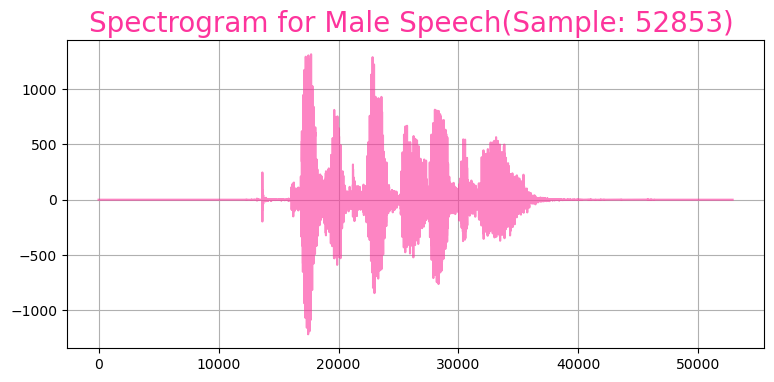

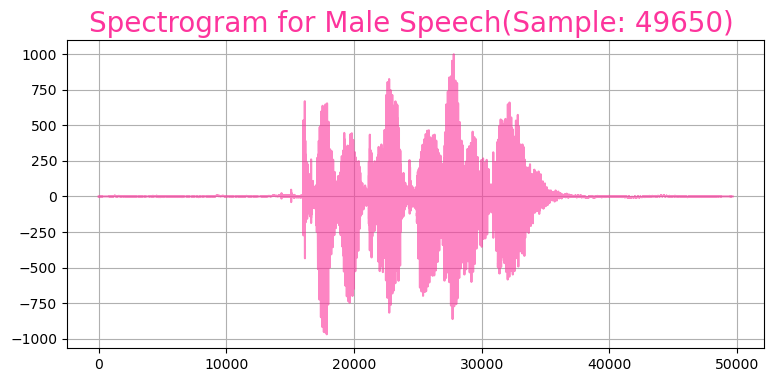

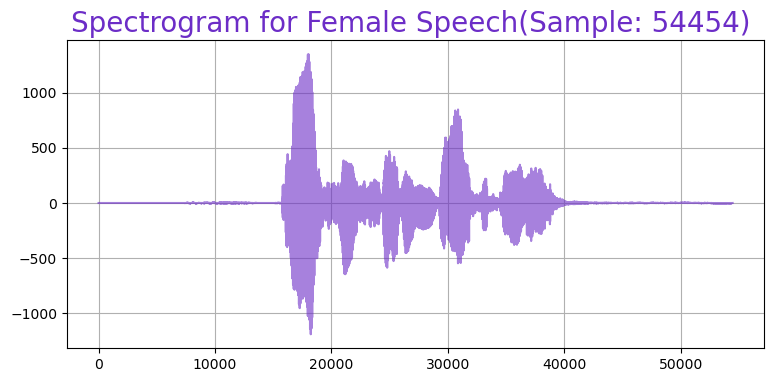

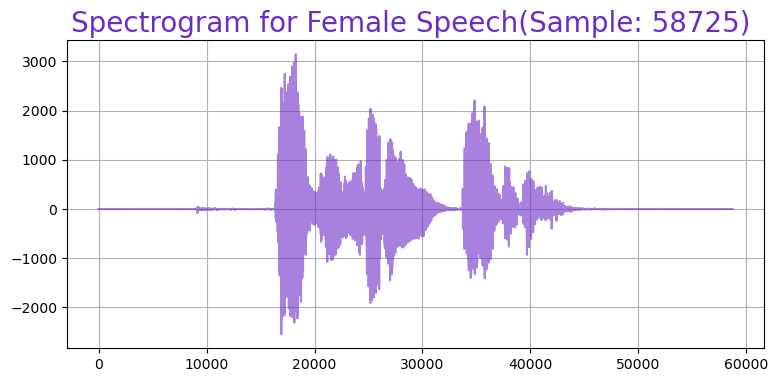

In [8]:
SpecGraph(RavLoc,emotion_data)

In [9]:
emotion_data

,Location,File,Gender,File_Size,Extension
0,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-01-01-02.wav,Female,116506,wav
1,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-01-02-02.wav,Female,115440,wav
2,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-02-01-02.wav,Female,120778,wav
3,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-01-01-02-02-02.wav,Female,115438,wav
4,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-01-01-02.wav,Female,122914,wav
...,...,...,...,...,...
1435,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-01-02-02-23.wav,Male,105830,wav
1436,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-01-01-23.wav,Male,112236,wav
1437,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-01-02-23.wav,Male,107964,wav
1438,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-02-01-23.wav,Male,106898,wav


In [10]:
lcs=emotion_data['Location'].tolist()
emotion=[]
# 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
for l in lcs:
    denom=int(l.split("\\")[-1].split("-")[2])
    if denom==1:
        emotion.append("Neutral")
    if denom==2:
        emotion.append("Calm")
    if denom==3:
        emotion.append("Happy")
    if denom==4:
        emotion.append("Sad")
    if denom==5:
        emotion.append("Angry")
    if denom==6:
        emotion.append("Fearful")
    if denom==7:
        emotion.append("Disgust")
    if denom==8:
        emotion.append("Surprised")
emotion_data['Emotion']=emotion

In [11]:
emotion_data=emotion_data.sample(frac=1).reset_index(drop=True)
emotion_data

,Location,File,Gender,File_Size,Extension,Emotion
0,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-05-01-02-01-18.wav,Female,114372,wav,Angry
1,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-02-02-05.wav,Male,135726,wav,Calm
2,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-02-01-21.wav,Male,121846,wav,Calm
3,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-02-02-01-24.wav,Female,129320,wav,Calm
4,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-05-01-02-01-14.wav,Female,119710,wav,Angry
...,...,...,...,...,...,...
1435,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-03-01-02-01-14.wav,Female,109032,wav,Happy
1436,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-03-02-02-01-24.wav,Female,123982,wav,Happy
1437,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-06-02-01-01-01.wav,Male,160284,wav,Fearful
1438,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-02-01-06.wav,Female,105830,wav,Surprised


<Axes: title={'center': 'Emotion Types by Gender'}, ylabel='Gender'>

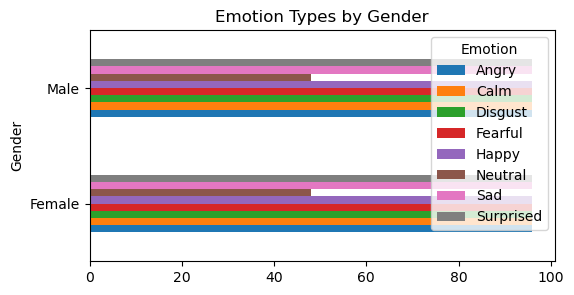

In [12]:
ps.crosstab(emotion_data['Gender'],emotion_data['Emotion']).plot(kind='barh',title="Emotion Types by Gender",figsize=(6,3))

Emotion
Angry        192
Calm         192
Disgust      192
Happy        192
Fearful      192
Surprised    192
Sad          192
Neutral       96
Name: count, dtype: int64

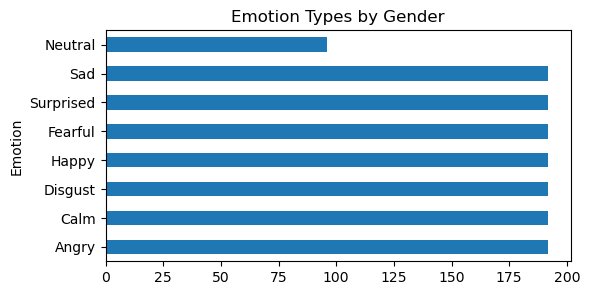

In [121]:
emotion_data['Emotion'].value_counts().plot(kind='barh',title="Emotion Types by Gender",figsize=(6,3))
emotion_data['Emotion'].value_counts()

In [13]:
def FetExtSpeech(rvdr,aud_offset,SR):
    DfFT = ps.DataFrame(columns=['Extracted'])
    ixs=0
    for idx_fl,rvlc in enumerate(rvdr.Location):      
        try:
            fts, smp_spch = librosa.load(rvlc, mono=True,res_type='kaiser_best',duration=3,sr=SR,offset=aud_offset)
            smp_spch = nuy.array(smp_spch)

            prepdt = nuy.mean(librosa.feature.mfcc(y=fts, sr=smp_spch, n_mfcc=14),axis=0) 

            DfFT.loc[ixs] = [prepdt]
            ixs=ixs+1  
        except:
            pass
    return DfFT  
rateofsmp=[16000, 22050, 24000, 32000, 44100, 48000, 88200, 96000]
FetExtData=[]
idx=1
for i in range(len(rateofsmp)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Preparing Data-{}".format(idx))
    FetExtData.append(FetExtSpeech(emotion_data,0.3,rateofsmp[i]))
    print("Data-{} Prepared ({} Hz)".format(idx,rateofsmp[i]))
    idx+=1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-1
Data-1 Prepared (16000 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-2
Data-2 Prepared (22050 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-3
Data-3 Prepared (24000 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-4
Data-4 Prepared (32000 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-5
Data-5 Prepared (44100 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-6
Data-6 Prepared (48000 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-7
Data-7 Prepared (88200 Hz)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing Data-8
Data-8 Prepared (96000 Hz)


In [14]:
rateofsmp=[16000, 22050, 24000, 32000, 44100, 48000, 88200, 96000]
print(*rateofsmp, sep="\n")

16000
22050
24000
32000
44100
48000
88200
96000


In [15]:
FetExtData[0]

,Extracted
0,"[-50.926662, -50.841206, -50.165318, -50.92666..."
1,"[-56.734215, -56.358307, -56.23039, -55.358036..."
2,"[-50.524487, -47.263153, -45.339855, -44.13311..."
3,"[-64.23069, -64.1849, -64.15944, -64.25681, -6..."
4,"[-52.16032, -52.16032, -52.16032, -52.16032, -..."
...,...
1435,"[-55.29611, -55.29611, -55.29611, -55.29611, -..."
1436,"[-52.92849, -52.92849, -52.92849, -52.92849, -..."
1437,"[-37.386806, -35.69643, -36.44355, -40.052433,..."
1438,"[-56.400764, -56.35406, -54.45071, -55.324867,..."


In [16]:
FetExtData[1]

,Extracted
0,"[-50.093456, -50.093456, -49.68707, -49.48775,..."
1,"[-56.83201, -56.197407, -59.129436, -56.08069,..."
2,"[-51.95824, -48.482296, -47.294857, -45.80416,..."
3,"[-64.71975, -64.71975, -64.75068, -64.80491, -..."
4,"[-51.949535, -51.949535, -51.949535, -51.94953..."
...,...
1435,"[-53.822357, -53.822357, -53.822357, -53.82235..."
1436,"[-53.48894, -53.48894, -53.48894, -53.48894, -..."
1437,"[-39.639076, -37.2005, -37.262775, -37.719902,..."
1438,"[-56.656746, -56.656746, -55.919373, -54.19721..."


In [17]:
FetExtData[2]

,Extracted
0,"[-50.56205, -50.56205, -50.31206, -49.610115, ..."
1,"[-56.84005, -55.99589, -59.260616, -56.90061, ..."
2,"[-52.125256, -48.546467, -47.520992, -46.16550..."
3,"[-64.97949, -64.97949, -65.01, -64.9926, -65.0..."
4,"[-51.618355, -51.618355, -51.618355, -51.61835..."
...,...
1435,"[-54.63477, -54.63477, -54.63477, -54.63477, -..."
1436,"[-52.172558, -52.172558, -52.172558, -52.17255..."
1437,"[-40.014626, -37.284016, -37.531048, -37.3589,..."
1438,"[-56.633812, -56.633812, -56.477993, -54.31850..."


In [18]:
FetExtData[3]

,Extracted
0,"[-51.287365, -51.287365, -51.287365, -50.45810..."
1,"[-57.411503, -55.49143, -58.86953, -60.616337,..."
2,"[-53.0458, -49.423744, -48.62188, -47.730045, ..."
3,"[-65.00904, -65.00904, -65.00904, -64.71254, -..."
4,"[-51.616123, -51.616123, -51.616123, -51.61612..."
...,...
1435,"[-53.87586, -53.87586, -53.87586, -53.87586, -..."
1436,"[-52.97437, -52.97437, -52.97437, -52.97437, -..."
1437,"[-41.538338, -37.483173, -37.712982, -38.01273..."
1438,"[-55.974907, -55.974907, -55.974907, -55.81059..."


In [19]:
FetExtData[4]

,Extracted
0,"[-51.745914, -51.745914, -51.745914, -51.74591..."
1,"[-57.565792, -55.20501, -56.408077, -62.993034..."
2,"[-53.675243, -51.12855, -49.383404, -49.43768,..."
3,"[-65.01977, -65.01977, -65.01977, -65.01977, -..."
4,"[-51.17445, -51.17445, -51.17445, -51.17445, -..."
...,...
1435,"[-53.98221, -53.98221, -53.98221, -53.98221, -..."
1436,"[-52.343513, -52.343513, -52.343513, -52.34351..."
1437,"[-42.88627, -38.624577, -37.24774, -37.454433,..."
1438,"[-55.387413, -55.387413, -55.387413, -55.38741..."


In [20]:
FetExtData[5]

,Extracted
0,"[-51.490356, -51.490356, -51.490356, -51.49035..."
1,"[-57.903667, -55.161644, -55.887604, -62.08506..."
2,"[-53.55601, -51.46742, -49.537952, -49.81094, ..."
3,"[-65.097244, -65.097244, -65.097244, -65.09724..."
4,"[-51.184658, -51.184658, -51.184658, -51.18465..."
...,...
1435,"[-54.371178, -54.371178, -54.371178, -54.37117..."
1436,"[-52.079197, -52.079197, -52.079197, -52.07919..."
1437,"[-43.272644, -38.930817, -37.175358, -37.31472..."
1438,"[-55.199337, -55.199337, -55.199337, -55.19933..."


In [21]:
FetExtData[6]

,Extracted
0,"[-52.24533, -52.24533, -52.24533, -52.24533, -..."
1,"[-59.58222, -56.313564, -54.998234, -54.643467..."
2,"[-53.96744, -52.673176, -52.32679, -51.9032, -..."
3,"[-66.14976, -66.14976, -66.14976, -66.14976, -..."
4,"[-51.80035, -51.80035, -51.80035, -51.80035, -..."
...,...
1435,"[-54.31146, -54.31146, -54.31146, -54.31146, -..."
1436,"[-53.28042, -53.28042, -53.28042, -53.28042, -..."
1437,"[-42.807644, -40.958874, -39.14686, -36.98809,..."
1438,"[-55.316975, -55.316975, -55.316975, -55.31697..."


In [22]:
FetExtData[7]

,Extracted
0,"[-52.295414, -52.295414, -52.295414, -52.29541..."
1,"[-59.709637, -56.127144, -54.932228, -54.48706..."
2,"[-54.178383, -52.598534, -53.028492, -51.93014..."
3,"[-66.73725, -66.73725, -66.73725, -66.73725, -..."
4,"[-52.04662, -52.04662, -52.04662, -52.04662, -..."
...,...
1435,"[-54.322117, -54.322117, -54.322117, -54.32211..."
1436,"[-53.04676, -53.04676, -53.04676, -53.04676, -..."
1437,"[-42.407265, -40.830475, -38.995045, -37.56546..."
1438,"[-54.383022, -54.383022, -54.383022, -54.38302..."


In [23]:
emotion_data

,Location,File,Gender,File_Size,Extension,Emotion
0,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-05-01-02-01-18.wav,Female,114372,wav,Angry
1,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-02-02-05.wav,Male,135726,wav,Calm
2,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-01-02-01-21.wav,Male,121846,wav,Calm
3,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-02-02-02-01-24.wav,Female,129320,wav,Calm
4,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-05-01-02-01-14.wav,Female,119710,wav,Angry
...,...,...,...,...,...,...
1435,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-03-01-02-01-14.wav,Female,109032,wav,Happy
1436,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-03-02-02-01-24.wav,Female,123982,wav,Happy
1437,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-06-02-01-01-01.wav,Male,160284,wav,Fearful
1438,D:\Datasets\Speech Emotion Recognition\RAVDESS...,03-01-08-02-02-01-06.wav,Female,105830,wav,Surprised


In [24]:
def SetFeatures(rvdr,act_dt_aud,i):
    try:
        dt_aud_1 = ps.DataFrame(rvdr['Extracted'].values.tolist())                                  
        dt_aud = ps.concat([act_dt_aud.reset_index().drop(columns = 'index'),dt_aud_1],axis=1)   
    except:
        pass
    msval=sum(dt_aud.isna().sum())
    if msval!=0:
        #dt_aud=dt_aud.fillna(dt_aud.mode()[0])
        dt_aud.iloc[:,1:]=dt_aud.iloc[:,1:].fillna(dt_aud.iloc[:,1:].mean())
    else:
        pass
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("  Shape of Data-{} Before Resampling: ".format(i),dt_aud.shape)
    dt_aud=utils.resample(dt_aud, replace = True, n_samples = len(dt_aud)*5, random_state = 0)
    dt_aud=dt_aud.reset_index(drop=True)
    print("  Shape of Data-{} After Resampling: ".format(i),dt_aud.shape)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return dt_aud
Col_FetExtData=[]
for i in range(len(FetExtData)):
    Col_FetExtData.append(SetFeatures(FetExtData[i],emotion_data.drop(['Location','File','Gender','File_Size','Extension'],axis=1),i+1))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Shape of Data-1 Before Resampling:  (1440, 95)
  Shape of Data-1 After Resampling:  (7200, 95)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Shape of Data-2 Before Resampling:  (1440, 131)
  Shape of Data-2 After Resampling:  (7200, 131)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Shape of Data-3 Before Resampling:  (1440, 142)
  Shape of Data-3 After Resampling:  (7200, 142)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Shape of Data-4 Before Resampling:  (1440, 189)
  Shape of Data-4 After Resampling:  (7200, 189)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Shape of Data-5 Before Resampling:  (1440, 260)
  Shape of Data-5 After Resampling:  (7200, 260)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~

In [25]:
Col_FetExtData[0].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,84,85,86,87,88,89,90,91,92,93
0,Surprised,-43.966187,-44.477619,-44.891232,-45.593800,-49.488091,-49.601315,-47.222717,-45.374126,-45.150051,...,-48.205463,-46.838497,-46.897785,-46.926174,-46.420021,-43.414387,-42.933651,-43.569214,-43.711678,-45.705288
1,Surprised,-57.733143,-57.733143,-57.733143,-57.733143,-57.733143,-57.733143,-57.733143,-57.733143,-57.733143,...,-56.695126,-57.630882,-57.236462,-57.294186,-57.306114,-57.676414,-57.742542,-57.783398,-57.519711,-57.689953
2,Surprised,-52.852509,-50.944145,-49.578648,-52.408901,-52.852509,-52.852509,-52.801723,-52.498528,-52.852509,...,-49.665962,-49.833595,-50.735718,-51.955181,-50.197044,-50.039677,-52.702740,-52.801025,-51.847507,-52.401550
3,Sad,-47.676479,-46.363106,-46.586937,-45.151409,-44.633789,-44.280254,-45.343273,-46.162251,-45.457035,...,-37.397930,-38.473583,-39.873207,-40.078190,-40.543732,-41.473064,-41.973972,-42.093086,-41.537037,-39.639107
4,Angry,-43.053261,-43.053261,-43.053261,-43.053261,-43.053261,-43.053261,-43.053261,-43.053261,-43.053261,...,-38.194515,-38.674297,-40.008335,-39.683960,-41.342831,-41.691952,-41.161064,-40.538143,-39.713692,-39.548828


In [26]:
Col_FetExtData[1].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,Surprised,-43.878376,-44.763287,-46.257988,-45.159290,-45.496162,-49.266788,-50.622063,-49.858181,-49.285397,...,-47.568897,-48.318768,-45.645355,-43.305683,-43.341431,-44.305756,-44.210640,-44.559879,-46.421143,-47.406048
1,Surprised,-57.115639,-57.115639,-57.115639,-57.115639,-57.115639,-57.115639,-57.115639,-57.115639,-57.115639,...,-56.745728,-56.607174,-56.907135,-57.141888,-57.115639,-57.182861,-56.981209,-56.882137,-56.985195,-57.056194
2,Surprised,-52.234154,-52.234154,-49.138603,-49.695271,-52.234154,-52.234154,-52.234154,-52.234154,-52.234154,...,-51.915546,-50.661510,-48.985172,-50.656300,-52.234154,-52.234154,-52.059895,-51.464787,-52.164040,-52.157310
3,Sad,-48.029419,-46.485249,-46.797611,-47.198948,-45.502930,-44.895607,-45.068085,-44.501064,-45.498070,...,-40.460110,-41.004791,-41.641167,-42.362003,-42.197971,-42.369759,-42.420082,-41.758404,-40.910137,-39.868877
4,Angry,-42.473988,-42.473988,-42.473988,-42.473988,-42.473988,-42.473988,-42.473988,-42.473988,-42.473988,...,-40.087543,-41.272655,-41.679264,-41.850216,-41.148899,-41.120247,-40.468964,-40.150261,-39.675159,-40.613506


In [27]:
Col_FetExtData[2].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,Surprised,-43.967937,-44.968731,-46.591862,-45.986877,-45.063770,-47.856815,-51.354958,-50.364285,-50.037262,...,-48.225685,-48.569500,-45.552910,-43.465485,-43.719189,-44.601795,-44.556446,-44.511272,-46.542553,-47.198284
1,Surprised,-56.969200,-56.969200,-56.969200,-56.969200,-56.969200,-56.969200,-56.969200,-56.969200,-56.969200,...,-56.543598,-56.593109,-56.792625,-56.991600,-56.969200,-57.051594,-56.900677,-56.659821,-56.882561,-56.727531
2,Surprised,-51.694553,-51.694553,-49.369835,-48.812599,-51.586029,-51.694553,-51.694553,-51.694553,-51.694553,...,-51.694553,-49.795307,-48.741219,-50.703705,-51.694553,-51.694553,-51.694553,-50.931896,-51.694553,-51.550682
3,Sad,-48.057365,-46.452381,-46.658936,-47.255737,-46.222736,-44.879787,-45.114880,-44.887653,-44.508362,...,-40.504997,-41.337948,-41.826931,-42.504341,-42.194489,-42.337093,-42.664368,-41.754848,-41.660290,-39.772350
4,Angry,-42.166008,-42.166008,-42.166008,-42.166008,-42.166008,-42.166008,-42.166008,-42.166008,-42.166008,...,-40.418678,-41.257710,-41.529266,-41.750034,-40.962013,-41.026493,-40.492344,-40.005859,-39.886230,-39.974552


In [28]:
Col_FetExtData[3].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,178,179,180,181,182,183,184,185,186,187
0,Surprised,-43.577885,-45.059017,-46.544884,-47.465466,-46.574699,-45.241631,-46.513947,-49.645252,-52.294888,...,-44.774086,-43.220325,-43.845699,-45.017822,-45.212246,-44.903137,-44.952442,-46.460075,-47.868587,-47.315861
1,Surprised,-55.867653,-55.867653,-55.867653,-55.867653,-55.867653,-55.867653,-55.867653,-55.867653,-55.867653,...,-55.858917,-55.867653,-55.867653,-55.899567,-55.832180,-55.728584,-55.689388,-55.836498,-55.774754,-55.663334
2,Surprised,-51.225864,-51.225864,-51.225864,-48.387379,-48.607788,-51.225864,-51.225864,-51.225864,-51.225864,...,-49.554504,-51.175106,-51.225864,-51.225864,-51.225864,-51.225864,-50.347809,-51.225864,-51.225864,-51.094425
3,Sad,-48.481319,-46.953625,-46.825695,-47.294777,-47.969696,-47.447807,-45.689125,-45.408375,-45.854305,...,-43.150745,-42.935490,-42.768681,-42.576969,-43.587543,-43.011230,-42.144405,-42.230518,-41.945862,-39.935558
4,Angry,-41.299507,-41.299507,-41.299507,-41.299507,-41.299507,-41.299507,-41.299507,-41.299507,-41.299507,...,-40.919304,-41.210571,-40.575562,-40.576225,-40.628532,-39.673748,-39.690010,-40.315754,-39.491570,-40.383156


In [29]:
Col_FetExtData[4].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,Surprised,-43.413177,-45.573456,-46.673340,-47.277260,-48.217579,-47.550869,-46.718422,-45.854221,-46.430359,...,-44.993343,-46.182350,-45.686481,-45.151924,-46.124943,-45.576996,-46.957279,-49.197578,-47.479057,-48.099941
1,Surprised,-55.633842,-55.633842,-55.633842,-55.633842,-55.633842,-55.633842,-55.633842,-55.633842,-55.633842,...,-55.633842,-55.625282,-55.530823,-55.485970,-55.528927,-55.337765,-55.631355,-55.633842,-55.028038,-55.479420
2,Surprised,-50.897408,-50.897408,-50.897408,-50.897408,-48.683567,-47.612202,-49.730946,-50.897408,-50.897408,...,-50.897408,-50.897408,-50.897408,-50.897408,-50.142365,-50.351570,-50.897408,-50.897408,-50.572426,-50.897408
3,Sad,-48.202549,-47.710567,-46.396446,-47.407810,-46.963390,-48.269432,-47.837322,-47.662563,-46.141003,...,-42.307941,-43.500984,-43.830894,-44.076576,-42.287395,-42.316048,-42.298836,-42.559231,-42.235775,-40.118591
4,Angry,-40.565403,-40.565403,-40.565403,-40.565403,-40.565403,-40.565403,-40.565403,-40.565403,-40.565403,...,-40.205982,-40.279110,-40.329689,-39.552959,-38.965672,-40.333683,-40.542358,-39.083927,-39.620644,-40.975025


In [30]:
Col_FetExtData[5].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,272,273,274,275,276,277,278,279,280,281
0,Surprised,-43.271137,-45.432842,-46.867554,-47.144646,-48.100872,-48.581310,-47.168724,-46.388969,-46.005562,...,-46.066994,-46.425529,-45.123756,-46.262577,-45.579796,-45.707478,-48.901123,-48.720173,-47.391502,-48.667488
1,Surprised,-55.689911,-55.689911,-55.689911,-55.689911,-55.689911,-55.689911,-55.689911,-55.689911,-55.689911,...,-55.712887,-55.553131,-55.516808,-55.576668,-55.378361,-55.607819,-55.689911,-55.646843,-54.919727,-55.682842
2,Surprised,-50.585003,-50.585003,-50.585003,-50.585003,-49.923206,-47.285034,-48.636261,-50.539738,-50.585003,...,-50.585003,-50.585003,-50.585003,-50.532410,-49.553318,-50.585003,-50.585003,-50.585003,-50.258736,-50.585003
3,Sad,-47.978516,-47.678997,-46.303501,-46.753819,-47.155479,-47.166588,-48.302948,-47.472137,-47.399578,...,-43.186329,-43.651768,-44.046947,-42.538586,-41.868107,-42.147224,-42.020363,-42.371590,-41.750324,-40.321259
4,Angry,-41.135014,-41.135014,-41.135014,-41.135014,-41.135014,-41.135014,-41.135014,-41.135014,-41.135014,...,-40.892529,-40.773434,-40.286228,-39.150551,-40.178749,-41.157185,-40.134304,-39.460991,-40.377361,-41.761757


In [31]:
Col_FetExtData[6].head()

,Emotion,0,1,2,3,4,5,6,7,8,...,507,508,509,510,511,512,513,514,515,516
0,Surprised,-42.537228,-44.512074,-49.481953,-47.948025,-47.507561,-45.978550,-48.030243,-47.907642,-47.207500,...,-46.651611,-44.993134,-45.049831,-47.334492,-50.666775,-49.289604,-47.919518,-47.889446,-49.034698,-48.445148
1,Surprised,-56.240276,-56.240276,-56.240276,-56.240276,-56.240276,-56.240276,-56.240276,-56.240276,-56.240276,...,-55.631584,-54.874996,-56.240276,-56.240276,-56.015350,-56.240276,-56.266056,-54.419930,-54.844933,-56.240276
2,Surprised,-52.196064,-52.196064,-52.196064,-52.196064,-52.196064,-52.196064,-52.196064,-52.196064,-51.420158,...,-49.778816,-51.955441,-52.196064,-52.196064,-52.196064,-52.196064,-52.196064,-51.108299,-51.375336,-52.196064
3,Sad,-48.761257,-47.132153,-48.854961,-47.900269,-45.892029,-46.736263,-48.020103,-49.265980,-46.146507,...,-41.296200,-43.180622,-42.184536,-41.804497,-42.971302,-43.746517,-42.836761,-42.101673,-42.629871,-40.763111
4,Angry,-41.209541,-41.209541,-41.209541,-41.209541,-41.209541,-41.209541,-41.209541,-41.209541,-41.209541,...,-41.061710,-42.190662,-41.537861,-41.875126,-41.062679,-39.594624,-40.915180,-40.848137,-41.177746,-42.494396


In [54]:
def OutFunc(rvdr,n,w,h,col):
    arrrvdr=nuy.array(rvdr.iloc[:,:-1])
    pcamdl = decomposition.PCA(n_components=n)
    pcamdl.fit(arrrvdr)
    print(pcamdl.explained_variance_ratio_)
    cmpn_pca=["Comp-{}".format(i+1) for i in range(len(pcamdl.explained_variance_ratio_.tolist()))]
    empl.figure(figsize=(w,h))
    empl.title("PCA Component Variance ({})".format(round(max(pcamdl.explained_variance_ratio_),3)),fontsize=18)
    empl.bar(cmpn_pca,pcamdl.explained_variance_ratio_.tolist(),width=0.5,color=col)
    empl.plot(pcamdl.explained_variance_ratio_.tolist(),"--kX")
    empl.xlabel("Components",fontsize=14)
    empl.ylabel("Variance",fontsize=14)
    empl.grid()
    empl.show()
    return pcamdl.explained_variance_ratio_
def NormSpch(rvdr):
    nrm_mdl = preprocessing.MinMaxScaler()
    datanrm=nrm_mdl.fit_transform(rvdr)
    return datanrm

[0.56990115 0.13409361]


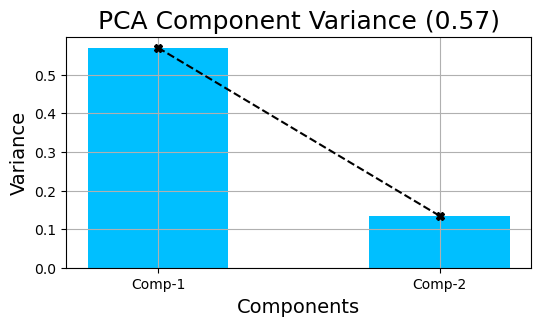

[0.55340484 0.13721515]


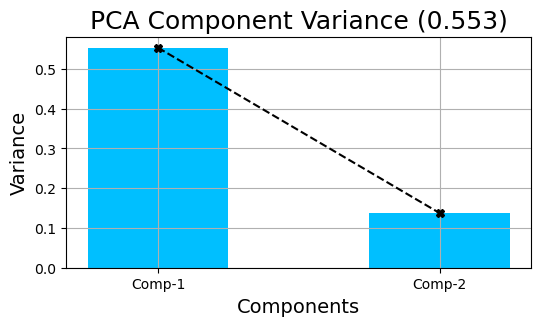

[0.54859672 0.13939835]


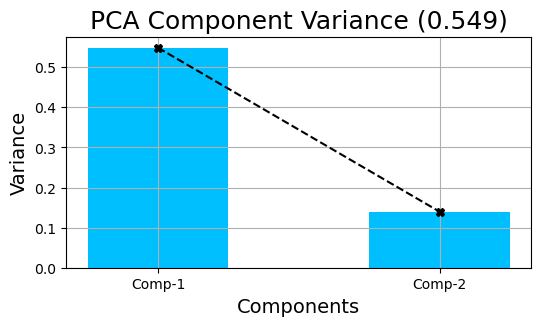

[0.53188626 0.14703895]


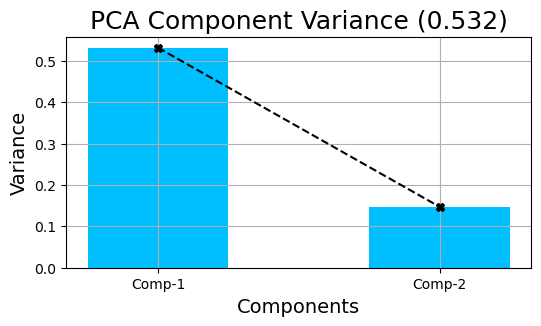

[0.52082688 0.15139908]


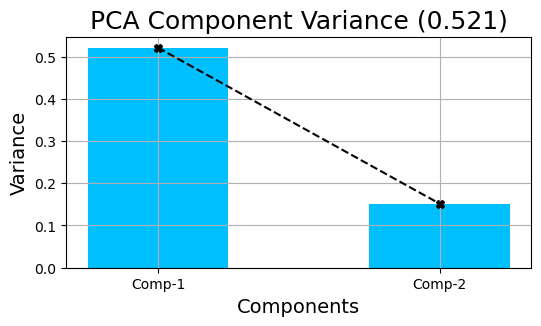

[0.5153253  0.15261288]


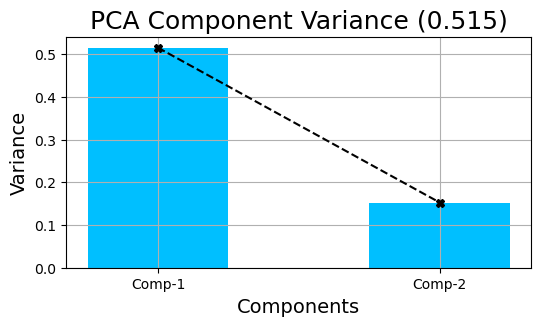

[0.47706716 0.15695735]


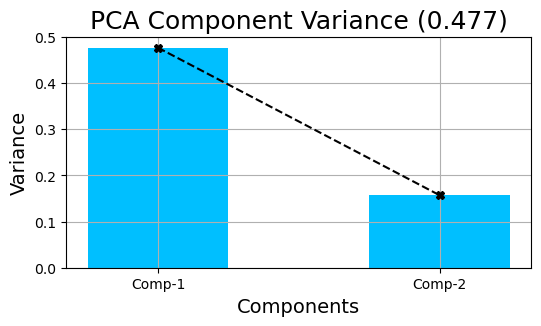

[0.4673368 0.1585643]


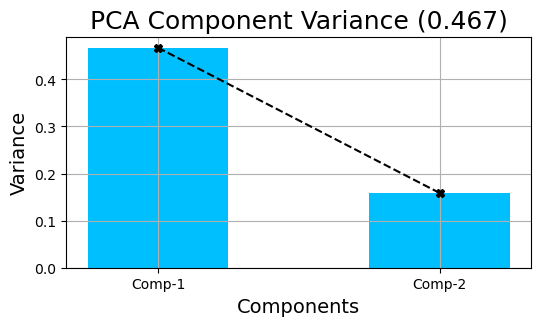

[array([0.56990115, 0.13409361]),
 array([0.55340484, 0.13721515]),
 array([0.54859672, 0.13939835]),
 array([0.53188626, 0.14703895]),
 array([0.52082688, 0.15139908]),
 array([0.5153253 , 0.15261288]),
 array([0.47706716, 0.15695735]),
 array([0.4673368, 0.1585643])]

In [55]:
SpOutliers=[]
for x in range(len(Col_FetExtData)):
    SpOutliers.append(OutFunc(Col_FetExtData[x].drop('Emotion',axis=1),2,6,3,"#00BFFF"))
SpOutliers

In [57]:
outs=[]
for d in range(len(SpOutliers)):
    tmp=[]
    for c in SpOutliers[d]:
        if c>0.5:
            tmp.append('Yes')
        if 'Yes' in tmp:
            outs.append('Outlier')
Normalized_Data=[]
for o in range(8):
    if outs[o]=='Outlier':
        dt=NormSpch(Col_FetExtData[o].drop('Emotion',axis=1))
        NrmSpc=ps.DataFrame(dt,columns=Col_FetExtData[o].drop('Emotion',axis=1).columns.tolist())
        NrmSpc['Emotion']=Col_FetExtData[o]['Emotion']
        Normalized_Data.append(NrmSpc)

In [58]:
Normalized_Data[0].head()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,Emotion
0,0.577623,0.608111,0.603576,0.510482,0.426448,0.432289,0.469148,0.526940,0.545296,0.571449,...,0.404685,0.408462,0.408607,0.419521,0.471594,0.508525,0.513186,0.482778,0.434798,Surprised
1,0.335233,0.358517,0.360459,0.305728,0.293116,0.298412,0.296956,0.313311,0.321859,0.337854,...,0.217229,0.222926,0.230581,0.230770,0.234841,0.266804,0.282691,0.251058,0.246746,Surprised
2,0.421165,0.486350,0.514836,0.395532,0.372042,0.378764,0.377747,0.403792,0.408524,0.426649,...,0.352662,0.339587,0.322255,0.354032,0.361613,0.349067,0.363484,0.346246,0.329726,Surprised
3,0.512297,0.572608,0.571474,0.517944,0.504948,0.519891,0.499939,0.513317,0.539844,0.565605,...,0.549977,0.534524,0.526192,0.521408,0.503820,0.524190,0.537122,0.519271,0.529982,Sad
4,0.593696,0.634931,0.638372,0.553333,0.530507,0.540092,0.537456,0.567056,0.582528,0.608373,...,0.546491,0.532099,0.532961,0.507553,0.500187,0.537459,0.562337,0.549870,0.531399,Angry


In [59]:
Normalized_Data[0]['Emotion'].isna().sum()

0

In [60]:
len(Normalized_Data)

8

In [61]:
print(f"Length of Normalized_Data at the start: {len(Normalized_Data)}")
for nd in range(len(Normalized_Data)):
    print("Missing Values in Data {} Before Cleaning: {}".format(nd+1,sum(Normalized_Data[nd].isna().sum())))
    #Normalized_Data[nd].iloc[:,:-1]=Normalized_Data[nd].iloc[:,:-1].fillna(Normalized_Data[nd].iloc[:,:-1].mean())
    emd=Normalized_Data[nd]['Emotion']
    df1=Normalized_Data[nd].drop('Emotion',axis=1)
    df1=df1.fillna(df1.mean())
    Normalized_Data[nd]=df1
    Normalized_Data[nd]['Emotion']=emd
    print("Missing Values in Data {} After Cleaning: {}".format(nd+1,sum(Normalized_Data[nd].isna().sum())))

Length of Normalized_Data at the start: 8
Missing Values in Data 1 Before Cleaning: 0
Missing Values in Data 1 After Cleaning: 0
Missing Values in Data 2 Before Cleaning: 0
Missing Values in Data 2 After Cleaning: 0
Missing Values in Data 3 Before Cleaning: 0
Missing Values in Data 3 After Cleaning: 0
Missing Values in Data 4 Before Cleaning: 0
Missing Values in Data 4 After Cleaning: 0
Missing Values in Data 5 Before Cleaning: 0
Missing Values in Data 5 After Cleaning: 0
Missing Values in Data 6 Before Cleaning: 0
Missing Values in Data 6 After Cleaning: 0
Missing Values in Data 7 Before Cleaning: 0
Missing Values in Data 7 After Cleaning: 0
Missing Values in Data 8 Before Cleaning: 0
Missing Values in Data 8 After Cleaning: 0


In [62]:
ClfSpeech=[
    pipeline.make_pipeline(preprocessing.StandardScaler(),svm.SVC()),
    naive_bayes.GaussianNB(),
    ensemble.RandomForestClassifier(max_depth=10),
    neural_network.MLPClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.StackingClassifier(estimators=[('M1', ensemble.RandomForestClassifier()),  ('M2', tree.DecisionTreeClassifier())], final_estimator=ensemble.RandomForestClassifier()),
    ensemble.VotingClassifier(estimators=[('M1', ensemble.RandomForestClassifier()), ('M2', tree.DecisionTreeClassifier())], voting='hard')
]
NmSpeech=[
    "Support Vector Classifier",
    "Naive Bayes",
    "Random Forest",
    "MLP",
    "Decision Tree",
    "Hybrid Model (Stacking)",
    "Hybrid Model (Voting)"
]

In [124]:
ClfSpeech[0]

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [125]:
ClfSpeech[1]

GaussianNB()

In [126]:
ClfSpeech[2]

RandomForestClassifier(max_depth=10)

In [127]:
ClfSpeech[3]

MLPClassifier()

In [128]:
ClfSpeech[4]

DecisionTreeClassifier()

In [129]:
ClfSpeech[5]

StackingClassifier(estimators=[('M1', RandomForestClassifier()),
                               ('M2', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier())

In [130]:
ClfSpeech[6]

VotingClassifier(estimators=[('M1', RandomForestClassifier()),
                             ('M2', DecisionTreeClassifier())])

In [63]:
SpchPrd,SpchTrgt=[],[]
for s in range(len(Normalized_Data)):
    SpchPrd.append(Normalized_Data[s].drop('Emotion',axis=1))
    SpchTrgt.append(Normalized_Data[s]['Emotion'])

XTrSpchAll,XTsSpchAll,yTrSpchAll,yTsSpchAll=[],[],[],[]
for i in range(len(SpchPrd)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(SpchPrd[i], SpchTrgt[i],test_size=0.2,shuffle=True,random_state=32)
    XTrSpchAll.append(X_train)
    XTsSpchAll.append(X_test)
    yTrSpchAll.append(y_train)
    yTsSpchAll.append(y_test)


In [64]:
print("Class Distribution in Data 1(Training):\n",yTrSpchAll[0].value_counts())
print("\nClass Distribution in Data 1(Test):\n",yTsSpchAll[0].value_counts())

Class Distribution in Data 1(Training):
 Emotion
Sad          806
Happy        784
Calm         773
Disgust      761
Surprised    756
Fearful      746
Angry        739
Neutral      395
Name: count, dtype: int64

Class Distribution in Data 1(Test):
 Emotion
Disgust      238
Calm         199
Sad          193
Fearful      189
Angry        186
Surprised    177
Happy        168
Neutral       90
Name: count, dtype: int64


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-1
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


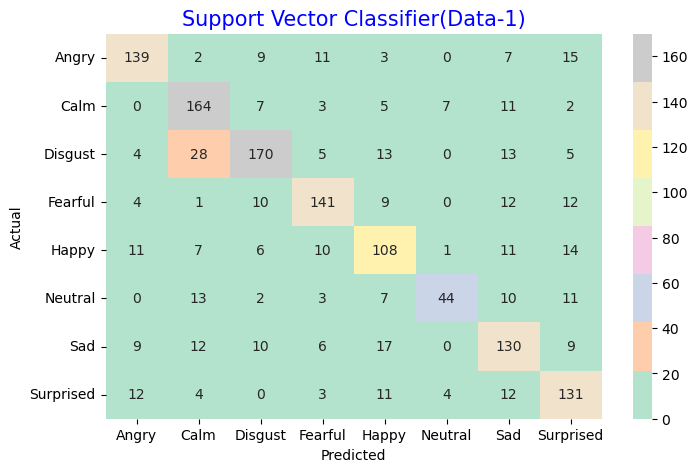

Classification Report for Support Vector Classifier (Data-1)
               precision    recall  f1-score   support

       Angry       0.78      0.75      0.76       186
        Calm       0.71      0.82      0.76       199
     Disgust       0.79      0.71      0.75       238
     Fearful       0.77      0.75      0.76       189
       Happy       0.62      0.64      0.63       168
     Neutral       0.79      0.49      0.60        90
         Sad       0.63      0.67      0.65       193
   Surprised       0.66      0.74      0.70       177

    accuracy                           0.71      1440
   macro avg       0.72      0.70      0.70      1440
weighted avg       0.72      0.71      0.71      1440

Train Accuracy: 79.11%
Test Accuracy : 71.32%
Precision : 71.88%
Recall : 71.32%
F1-Score : 71.24000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


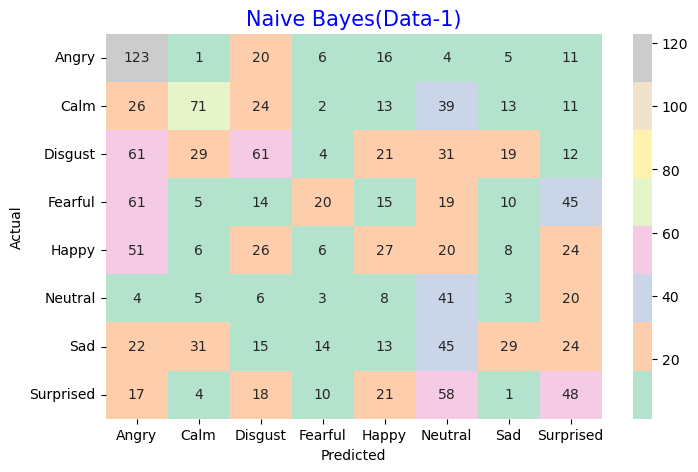

Classification Report for Naive Bayes (Data-1)
               precision    recall  f1-score   support

       Angry       0.34      0.66      0.45       186
        Calm       0.47      0.36      0.40       199
     Disgust       0.33      0.26      0.29       238
     Fearful       0.31      0.11      0.16       189
       Happy       0.20      0.16      0.18       168
     Neutral       0.16      0.46      0.24        90
         Sad       0.33      0.15      0.21       193
   Surprised       0.25      0.27      0.26       177

    accuracy                           0.29      1440
   macro avg       0.30      0.30      0.27      1440
weighted avg       0.31      0.29      0.28      1440

Train Accuracy: 29.909999999999997%
Test Accuracy : 29.17%
Precision : 31.119999999999997%
Recall : 29.17%
F1-Score : 27.700000000000003%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-

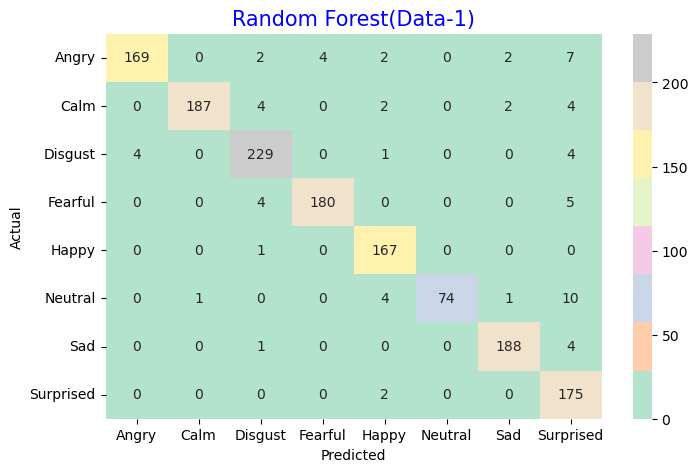

Classification Report for Random Forest (Data-1)
               precision    recall  f1-score   support

       Angry       0.98      0.91      0.94       186
        Calm       0.99      0.94      0.97       199
     Disgust       0.95      0.96      0.96       238
     Fearful       0.98      0.95      0.97       189
       Happy       0.94      0.99      0.97       168
     Neutral       1.00      0.82      0.90        90
         Sad       0.97      0.97      0.97       193
   Surprised       0.84      0.99      0.91       177

    accuracy                           0.95      1440
   macro avg       0.96      0.94      0.95      1440
weighted avg       0.95      0.95      0.95      1440

Train Accuracy: 97.72999999999999%
Test Accuracy : 95.07%
Precision : 95.45%
Recall : 95.07%
F1-Score : 95.09%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


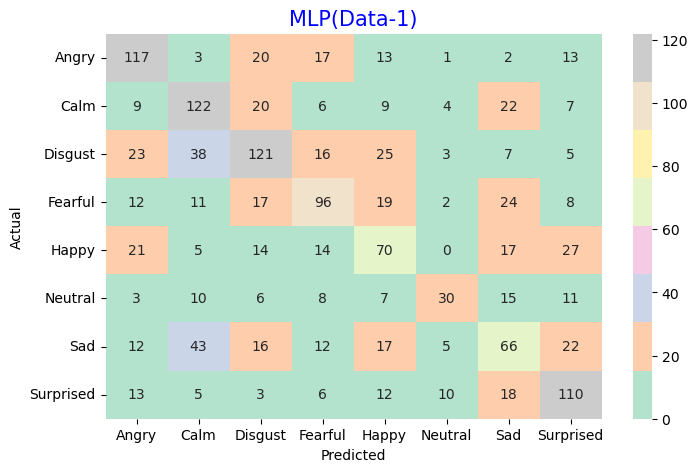

Classification Report for MLP (Data-1)
               precision    recall  f1-score   support

       Angry       0.56      0.63      0.59       186
        Calm       0.51      0.61      0.56       199
     Disgust       0.56      0.51      0.53       238
     Fearful       0.55      0.51      0.53       189
       Happy       0.41      0.42      0.41       168
     Neutral       0.55      0.33      0.41        90
         Sad       0.39      0.34      0.36       193
   Surprised       0.54      0.62      0.58       177

    accuracy                           0.51      1440
   macro avg       0.51      0.50      0.50      1440
weighted avg       0.51      0.51      0.50      1440

Train Accuracy: 56.55%
Test Accuracy : 50.83%
Precision : 50.72%
Recall : 50.83%
F1-Score : 50.449999999999996%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


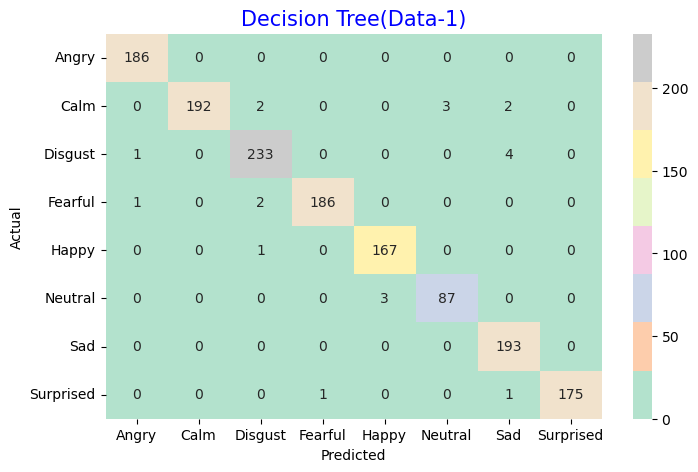

Classification Report for Decision Tree (Data-1)
               precision    recall  f1-score   support

       Angry       0.99      1.00      0.99       186
        Calm       1.00      0.96      0.98       199
     Disgust       0.98      0.98      0.98       238
     Fearful       0.99      0.98      0.99       189
       Happy       0.98      0.99      0.99       168
     Neutral       0.97      0.97      0.97        90
         Sad       0.96      1.00      0.98       193
   Surprised       1.00      0.99      0.99       177

    accuracy                           0.99      1440
   macro avg       0.98      0.98      0.98      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.54%
Precision : 98.56%
Recall : 98.54%
F1-Score : 98.54%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


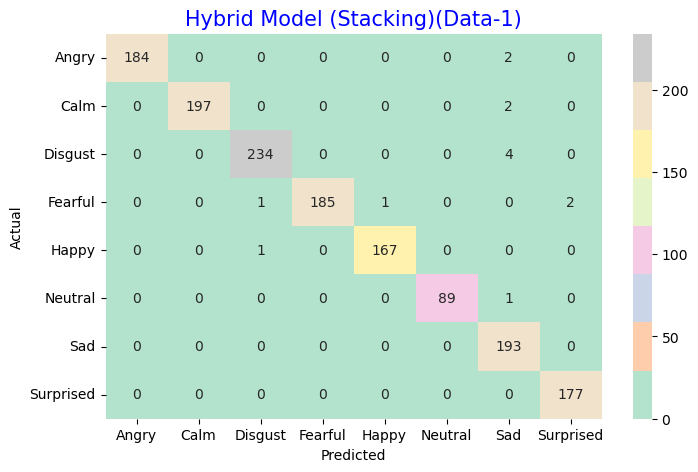

Classification Report for Hybrid Model (Stacking) (Data-1)
               precision    recall  f1-score   support

       Angry       1.00      0.99      0.99       186
        Calm       1.00      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       1.00      0.98      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.96      1.00      0.98       193
   Surprised       0.99      1.00      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.03%
Precision : 99.06%
Recall : 99.03%
F1-Score : 99.03%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


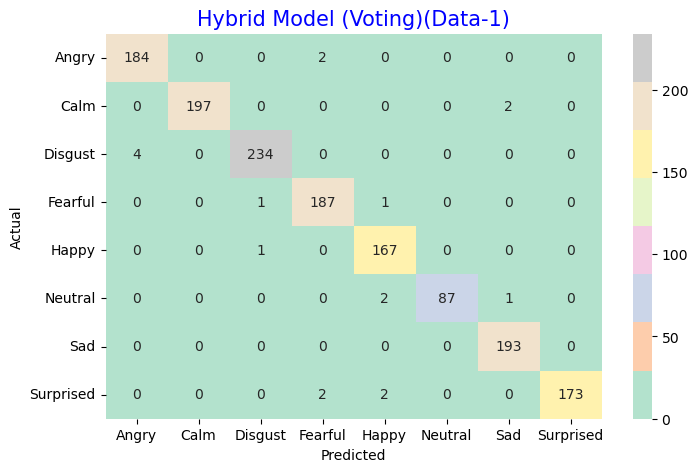

Classification Report for Hybrid Model (Voting) (Data-1)
               precision    recall  f1-score   support

       Angry       0.98      0.99      0.98       186
        Calm       1.00      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.99      0.98       189
       Happy       0.97      0.99      0.98       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       1.00      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.75%
Precision : 98.77%
Recall : 98.75%
F1-Score : 98.75%
Result Metrics for Data-1


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
5,Hybrid Model (Stacking),100.00,99.03,99.06,99.03,99.03
6,Hybrid Model (Voting),100.00,98.75,98.77,98.75,98.75
4,Decision Tree,100.00,98.54,98.56,98.54,98.54
2,Random Forest,97.73,95.07,95.45,95.07,95.09
0,Support Vector Classifier,79.11,71.32,71.88,71.32,71.24
3,MLP,56.55,50.83,50.72,50.83,50.45
1,Naive Bayes,29.91,29.17,31.12,29.17,27.70


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-2
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


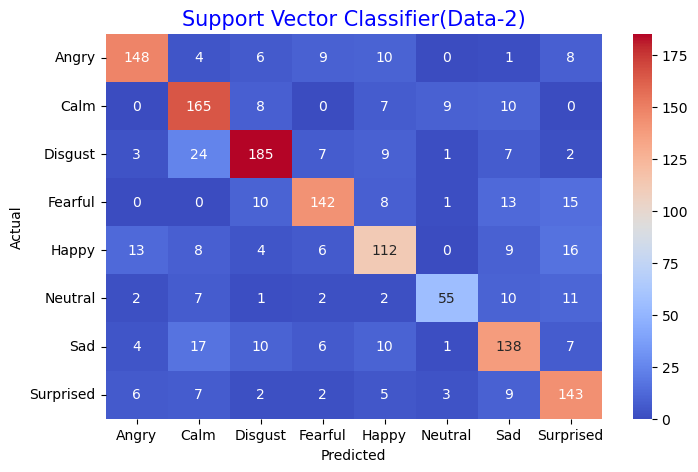

Classification Report for Support Vector Classifier (Data-2)
               precision    recall  f1-score   support

       Angry       0.84      0.80      0.82       186
        Calm       0.71      0.83      0.77       199
     Disgust       0.82      0.78      0.80       238
     Fearful       0.82      0.75      0.78       189
       Happy       0.69      0.67      0.68       168
     Neutral       0.79      0.61      0.69        90
         Sad       0.70      0.72      0.71       193
   Surprised       0.71      0.81      0.75       177

    accuracy                           0.76      1440
   macro avg       0.76      0.74      0.75      1440
weighted avg       0.76      0.76      0.76      1440

Train Accuracy: 82.53%
Test Accuracy : 75.56%
Precision : 75.94999999999999%
Recall : 75.56%
F1-Score : 75.53999999999999%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

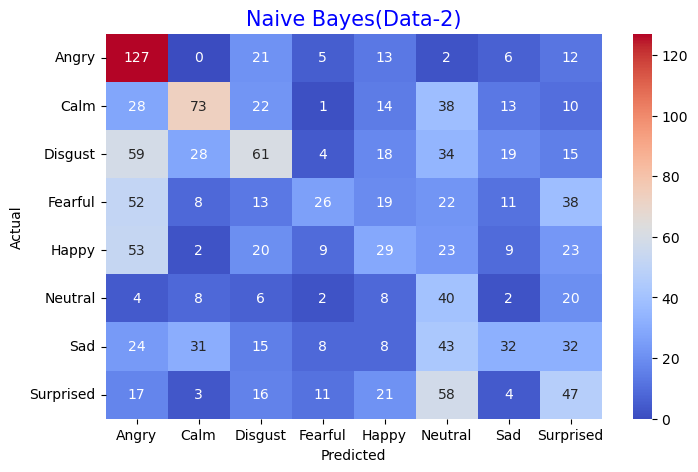

Classification Report for Naive Bayes (Data-2)
               precision    recall  f1-score   support

       Angry       0.35      0.68      0.46       186
        Calm       0.48      0.37      0.41       199
     Disgust       0.35      0.26      0.30       238
     Fearful       0.39      0.14      0.20       189
       Happy       0.22      0.17      0.19       168
     Neutral       0.15      0.44      0.23        90
         Sad       0.33      0.17      0.22       193
   Surprised       0.24      0.27      0.25       177

    accuracy                           0.30      1440
   macro avg       0.31      0.31      0.28      1440
weighted avg       0.33      0.30      0.29      1440

Train Accuracy: 30.819999999999997%
Test Accuracy : 30.209999999999997%
Precision : 33.03%
Recall : 30.209999999999997%
F1-Score : 29.020000000000003%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

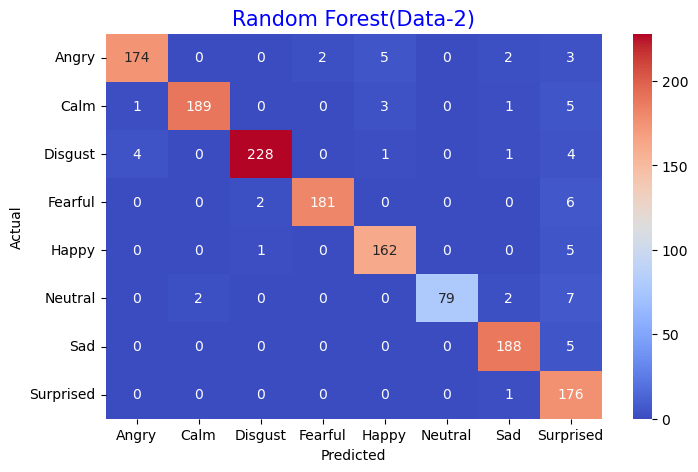

Classification Report for Random Forest (Data-2)
               precision    recall  f1-score   support

       Angry       0.97      0.94      0.95       186
        Calm       0.99      0.95      0.97       199
     Disgust       0.99      0.96      0.97       238
     Fearful       0.99      0.96      0.97       189
       Happy       0.95      0.96      0.96       168
     Neutral       1.00      0.88      0.93        90
         Sad       0.96      0.97      0.97       193
   Surprised       0.83      0.99      0.91       177

    accuracy                           0.96      1440
   macro avg       0.96      0.95      0.95      1440
weighted avg       0.96      0.96      0.96      1440

Train Accuracy: 97.92999999999999%
Test Accuracy : 95.62%
Precision : 96.0%
Recall : 95.62%
F1-Score : 95.67999999999999%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


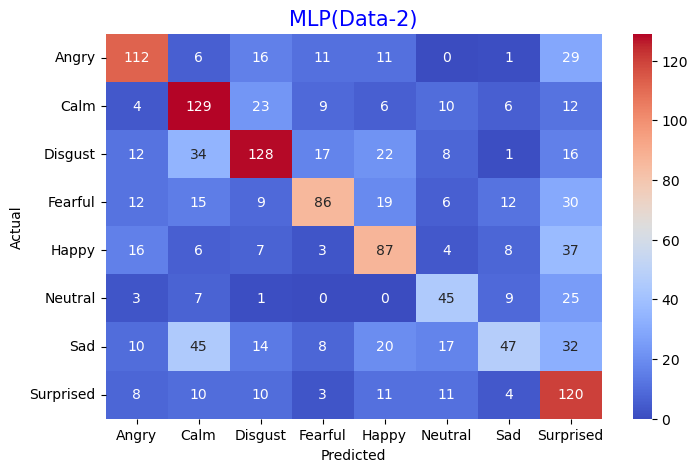

Classification Report for MLP (Data-2)
               precision    recall  f1-score   support

       Angry       0.63      0.60      0.62       186
        Calm       0.51      0.65      0.57       199
     Disgust       0.62      0.54      0.57       238
     Fearful       0.63      0.46      0.53       189
       Happy       0.49      0.52      0.51       168
     Neutral       0.45      0.50      0.47        90
         Sad       0.53      0.24      0.33       193
   Surprised       0.40      0.68      0.50       177

    accuracy                           0.52      1440
   macro avg       0.53      0.52      0.51      1440
weighted avg       0.54      0.52      0.52      1440

Train Accuracy: 57.47%
Test Accuracy : 52.35999999999999%
Precision : 54.269999999999996%
Recall : 52.35999999999999%
F1-Score : 51.790000000000006%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

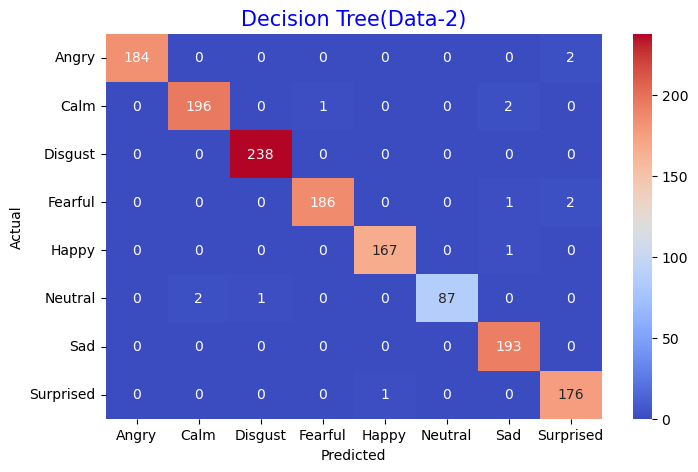

Classification Report for Decision Tree (Data-2)
               precision    recall  f1-score   support

       Angry       1.00      0.99      0.99       186
        Calm       0.99      0.98      0.99       199
     Disgust       1.00      1.00      1.00       238
     Fearful       0.99      0.98      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.98      0.99      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.1%
Precision : 99.11%
Recall : 99.1%
F1-Score : 99.1%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


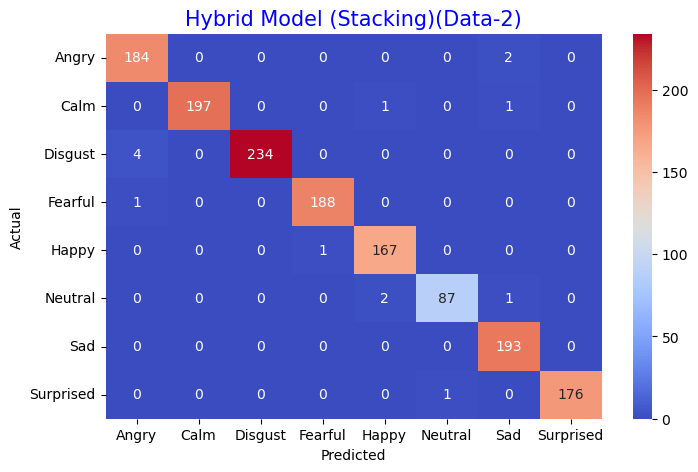

Classification Report for Hybrid Model (Stacking) (Data-2)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       1.00      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.99      0.99       189
       Happy       0.98      0.99      0.99       168
     Neutral       0.99      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       1.00      0.99      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.03%
Precision : 99.03999999999999%
Recall : 99.03%
F1-Score : 99.03%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

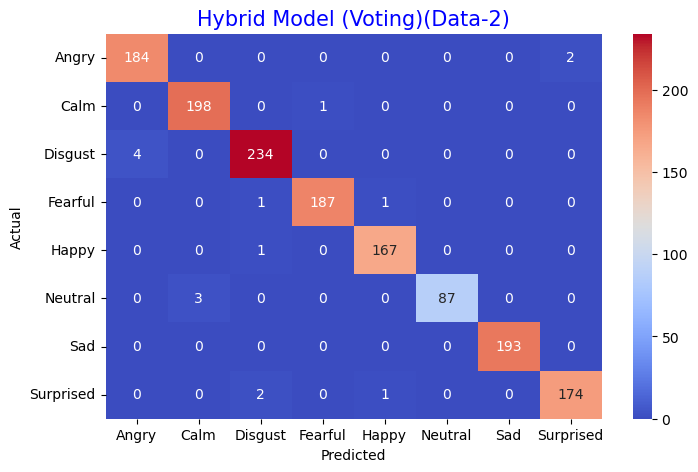

Classification Report for Hybrid Model (Voting) (Data-2)
               precision    recall  f1-score   support

       Angry       0.98      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.98      0.98      0.98       238
     Fearful       0.99      0.99      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.97      0.98        90
         Sad       1.00      1.00      1.00       193
   Surprised       0.99      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.89%
Precision : 98.89%
Recall : 98.89%
F1-Score : 98.89%
Result Metrics for Data-2


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
4,Decision Tree,100.00,99.10,99.11,99.10,99.10
5,Hybrid Model (Stacking),100.00,99.03,99.04,99.03,99.03
6,Hybrid Model (Voting),100.00,98.89,98.89,98.89,98.89
2,Random Forest,97.93,95.62,96.00,95.62,95.68
0,Support Vector Classifier,82.53,75.56,75.95,75.56,75.54
3,MLP,57.47,52.36,54.27,52.36,51.79
1,Naive Bayes,30.82,30.21,33.03,30.21,29.02


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-3
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


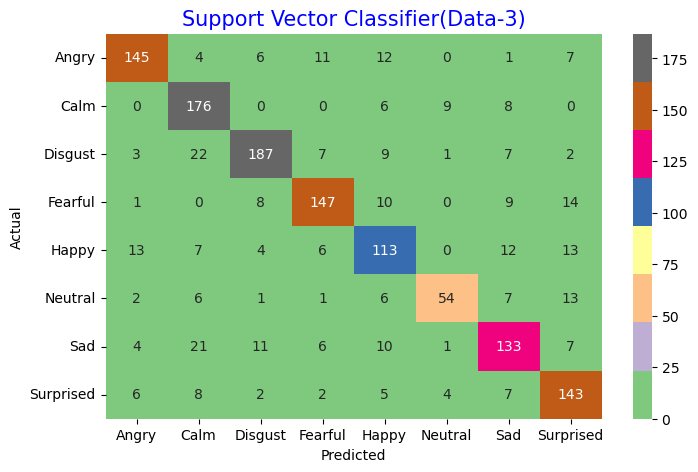

Classification Report for Support Vector Classifier (Data-3)
               precision    recall  f1-score   support

       Angry       0.83      0.78      0.81       186
        Calm       0.72      0.88      0.79       199
     Disgust       0.85      0.79      0.82       238
     Fearful       0.82      0.78      0.80       189
       Happy       0.66      0.67      0.67       168
     Neutral       0.78      0.60      0.68        90
         Sad       0.72      0.69      0.71       193
   Surprised       0.72      0.81      0.76       177

    accuracy                           0.76      1440
   macro avg       0.76      0.75      0.75      1440
weighted avg       0.77      0.76      0.76      1440

Train Accuracy: 83.66%
Test Accuracy : 76.25%
Precision : 76.68%
Recall : 76.25%
F1-Score : 76.2%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


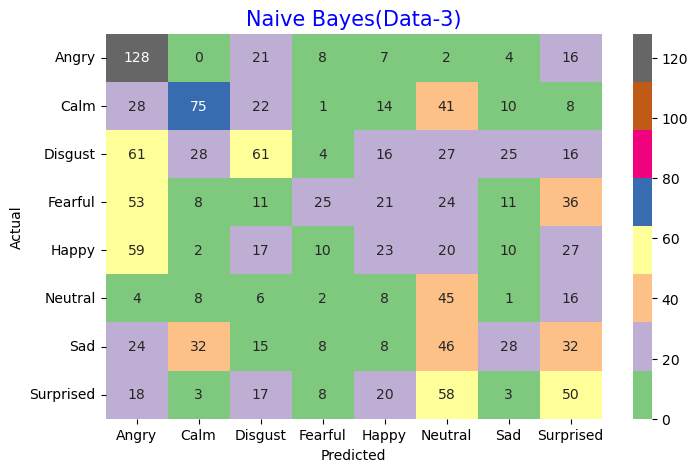

Classification Report for Naive Bayes (Data-3)
               precision    recall  f1-score   support

       Angry       0.34      0.69      0.46       186
        Calm       0.48      0.38      0.42       199
     Disgust       0.36      0.26      0.30       238
     Fearful       0.38      0.13      0.20       189
       Happy       0.20      0.14      0.16       168
     Neutral       0.17      0.50      0.25        90
         Sad       0.30      0.15      0.20       193
   Surprised       0.25      0.28      0.26       177

    accuracy                           0.30      1440
   macro avg       0.31      0.31      0.28      1440
weighted avg       0.32      0.30      0.29      1440

Train Accuracy: 30.830000000000002%
Test Accuracy : 30.209999999999997%
Precision : 32.45%
Recall : 30.209999999999997%
F1-Score : 28.610000000000003%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

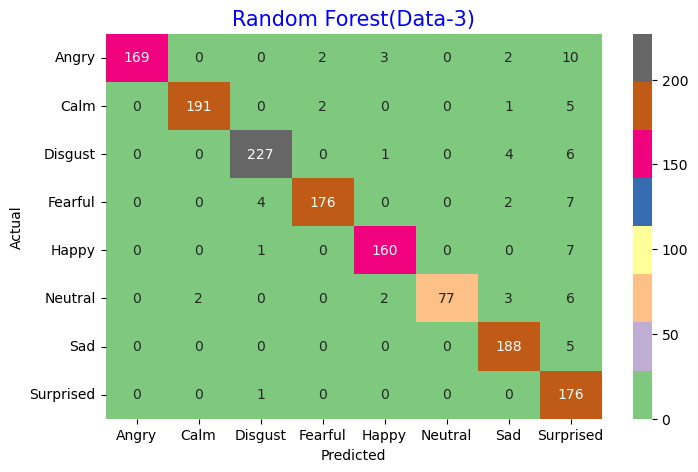

Classification Report for Random Forest (Data-3)
               precision    recall  f1-score   support

       Angry       1.00      0.91      0.95       186
        Calm       0.99      0.96      0.97       199
     Disgust       0.97      0.95      0.96       238
     Fearful       0.98      0.93      0.95       189
       Happy       0.96      0.95      0.96       168
     Neutral       1.00      0.86      0.92        90
         Sad       0.94      0.97      0.96       193
   Surprised       0.79      0.99      0.88       177

    accuracy                           0.95      1440
   macro avg       0.95      0.94      0.95      1440
weighted avg       0.95      0.95      0.95      1440

Train Accuracy: 97.53%
Test Accuracy : 94.72%
Precision : 95.37%
Recall : 94.72%
F1-Score : 94.82000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


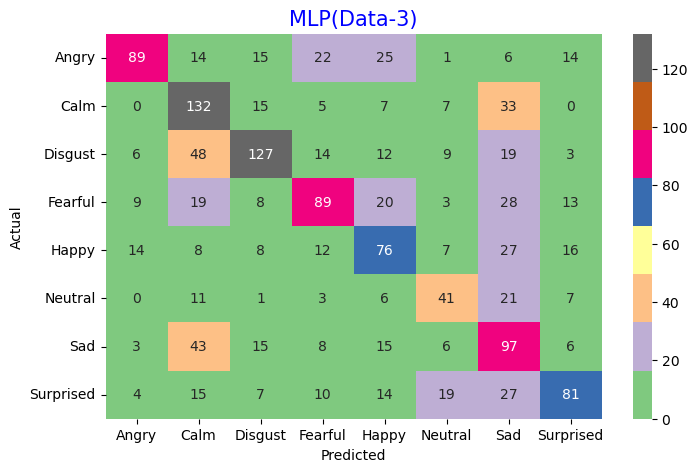

Classification Report for MLP (Data-3)
               precision    recall  f1-score   support

       Angry       0.71      0.48      0.57       186
        Calm       0.46      0.66      0.54       199
     Disgust       0.65      0.53      0.59       238
     Fearful       0.55      0.47      0.51       189
       Happy       0.43      0.45      0.44       168
     Neutral       0.44      0.46      0.45        90
         Sad       0.38      0.50      0.43       193
   Surprised       0.58      0.46      0.51       177

    accuracy                           0.51      1440
   macro avg       0.52      0.50      0.50      1440
weighted avg       0.53      0.51      0.51      1440

Train Accuracy: 58.45%
Test Accuracy : 50.83%
Precision : 53.339999999999996%
Recall : 50.83%
F1-Score : 51.18000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


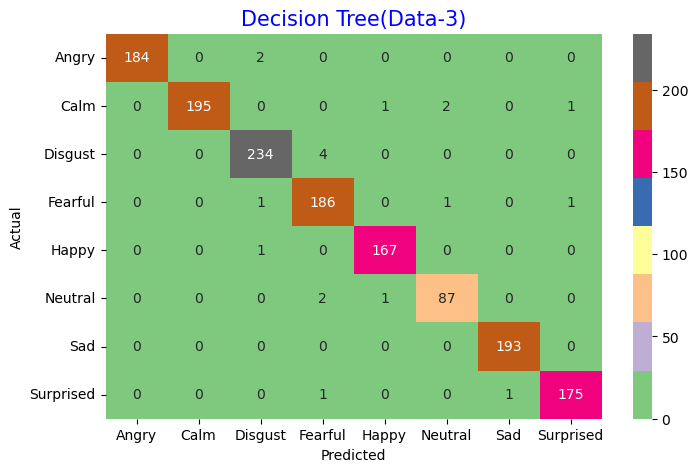

Classification Report for Decision Tree (Data-3)
               precision    recall  f1-score   support

       Angry       1.00      0.99      0.99       186
        Calm       1.00      0.98      0.99       199
     Disgust       0.98      0.98      0.98       238
     Fearful       0.96      0.98      0.97       189
       Happy       0.99      0.99      0.99       168
     Neutral       0.97      0.97      0.97        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.99      0.99      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.68%
Precision : 98.69%
Recall : 98.68%
F1-Score : 98.68%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


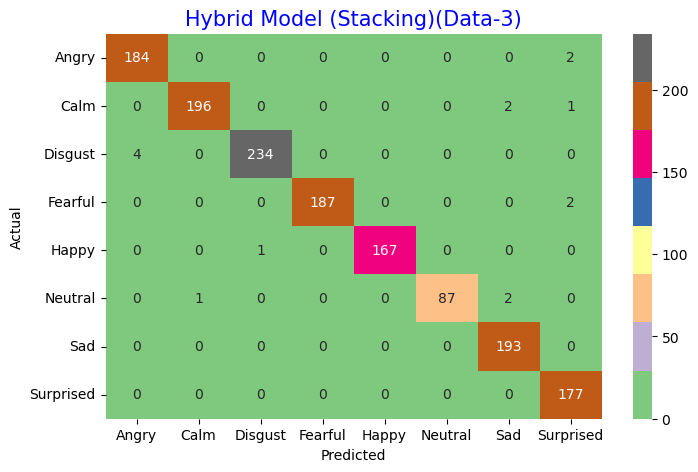

Classification Report for Hybrid Model (Stacking) (Data-3)
               precision    recall  f1-score   support

       Angry       0.98      0.99      0.98       186
        Calm       0.99      0.98      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       1.00      0.99      0.99       189
       Happy       1.00      0.99      1.00       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.97      1.00      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

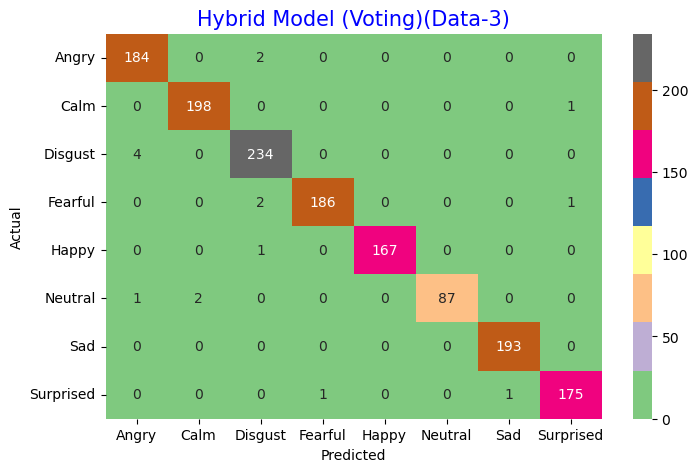

Classification Report for Hybrid Model (Voting) (Data-3)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.98      0.98      0.98       238
     Fearful       0.99      0.98      0.99       189
       Happy       1.00      0.99      1.00       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.99      0.99      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.89%
Precision : 98.9%
Recall : 98.89%
F1-Score : 98.89%
Result Metrics for Data-3


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
5,Hybrid Model (Stacking),100.00,98.96,98.97,98.96,98.96
6,Hybrid Model (Voting),100.00,98.89,98.90,98.89,98.89
4,Decision Tree,100.00,98.68,98.69,98.68,98.68
2,Random Forest,97.53,94.72,95.37,94.72,94.82
0,Support Vector Classifier,83.66,76.25,76.68,76.25,76.20
3,MLP,58.45,50.83,53.34,50.83,51.18
1,Naive Bayes,30.83,30.21,32.45,30.21,28.61


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-4
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


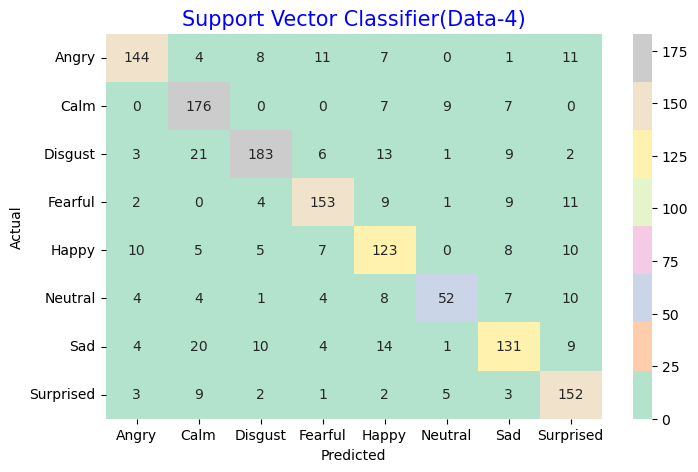

Classification Report for Support Vector Classifier (Data-4)
               precision    recall  f1-score   support

       Angry       0.85      0.77      0.81       186
        Calm       0.74      0.88      0.80       199
     Disgust       0.86      0.77      0.81       238
     Fearful       0.82      0.81      0.82       189
       Happy       0.67      0.73      0.70       168
     Neutral       0.75      0.58      0.65        90
         Sad       0.75      0.68      0.71       193
   Surprised       0.74      0.86      0.80       177

    accuracy                           0.77      1440
   macro avg       0.77      0.76      0.76      1440
weighted avg       0.78      0.77      0.77      1440

Train Accuracy: 84.89999999999999%
Test Accuracy : 77.36%
Precision : 77.81%
Recall : 77.36%
F1-Score : 77.27000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

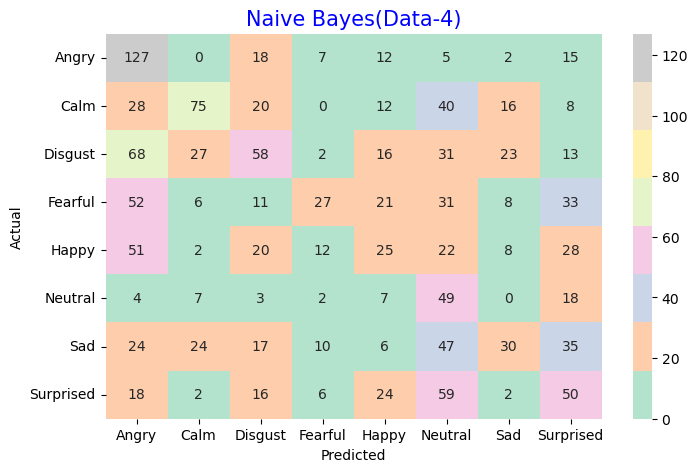

Classification Report for Naive Bayes (Data-4)
               precision    recall  f1-score   support

       Angry       0.34      0.68      0.46       186
        Calm       0.52      0.38      0.44       199
     Disgust       0.36      0.24      0.29       238
     Fearful       0.41      0.14      0.21       189
       Happy       0.20      0.15      0.17       168
     Neutral       0.17      0.54      0.26        90
         Sad       0.34      0.16      0.21       193
   Surprised       0.25      0.28      0.27       177

    accuracy                           0.31      1440
   macro avg       0.32      0.32      0.29      1440
weighted avg       0.34      0.31      0.29      1440

Train Accuracy: 31.369999999999997%
Test Accuracy : 30.620000000000005%
Precision : 33.95%
Recall : 30.620000000000005%
F1-Score : 29.26%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-

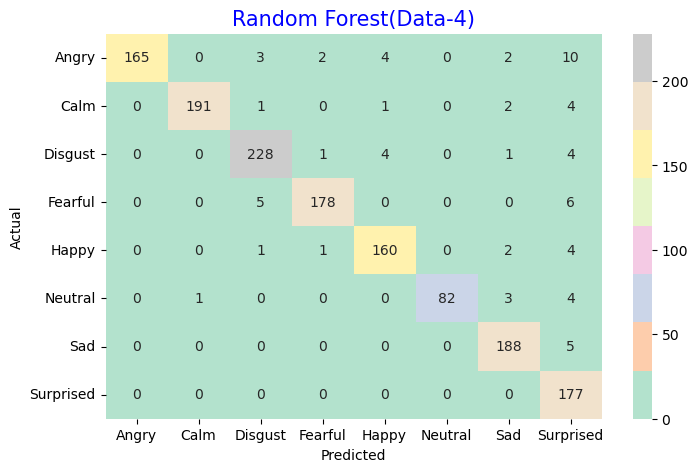

Classification Report for Random Forest (Data-4)
               precision    recall  f1-score   support

       Angry       1.00      0.89      0.94       186
        Calm       0.99      0.96      0.98       199
     Disgust       0.96      0.96      0.96       238
     Fearful       0.98      0.94      0.96       189
       Happy       0.95      0.95      0.95       168
     Neutral       1.00      0.91      0.95        90
         Sad       0.95      0.97      0.96       193
   Surprised       0.83      1.00      0.91       177

    accuracy                           0.95      1440
   macro avg       0.96      0.95      0.95      1440
weighted avg       0.96      0.95      0.95      1440

Train Accuracy: 97.47%
Test Accuracy : 95.07%
Precision : 95.52000000000001%
Recall : 95.07%
F1-Score : 95.13000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


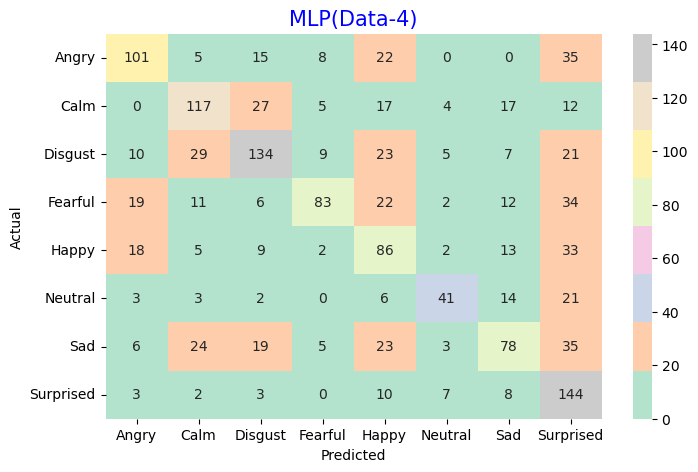

Classification Report for MLP (Data-4)
               precision    recall  f1-score   support

       Angry       0.63      0.54      0.58       186
        Calm       0.60      0.59      0.59       199
     Disgust       0.62      0.56      0.59       238
     Fearful       0.74      0.44      0.55       189
       Happy       0.41      0.51      0.46       168
     Neutral       0.64      0.46      0.53        90
         Sad       0.52      0.40      0.46       193
   Surprised       0.43      0.81      0.56       177

    accuracy                           0.54      1440
   macro avg       0.57      0.54      0.54      1440
weighted avg       0.58      0.54      0.54      1440

Train Accuracy: 60.589999999999996%
Test Accuracy : 54.44%
Precision : 57.53%
Recall : 54.44%
F1-Score : 54.42%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


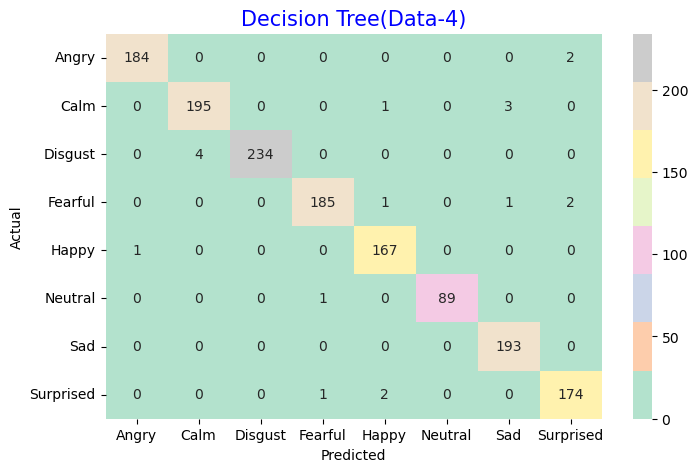

Classification Report for Decision Tree (Data-4)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.98      0.98      0.98       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.98      0.98       189
       Happy       0.98      0.99      0.99       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.98      0.98      0.98       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.68%
Precision : 98.69%
Recall : 98.68%
F1-Score : 98.68%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


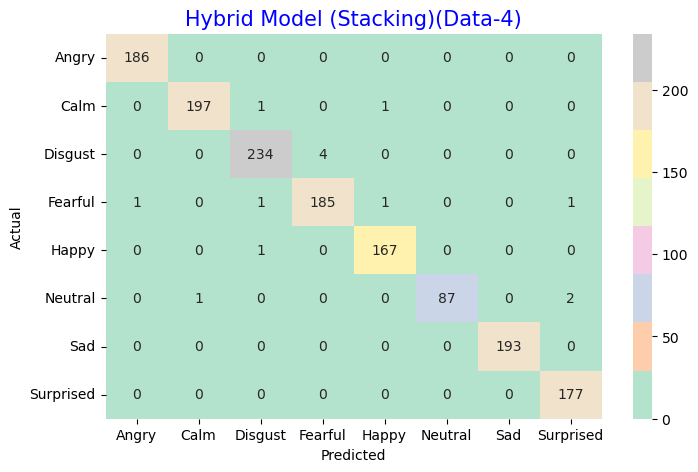

Classification Report for Hybrid Model (Stacking) (Data-4)
               precision    recall  f1-score   support

       Angry       0.99      1.00      1.00       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.98      0.98       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.97      0.98        90
         Sad       1.00      1.00      1.00       193
   Surprised       0.98      1.00      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.03%
Precision : 99.03%
Recall : 99.03%
F1-Score : 99.03%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


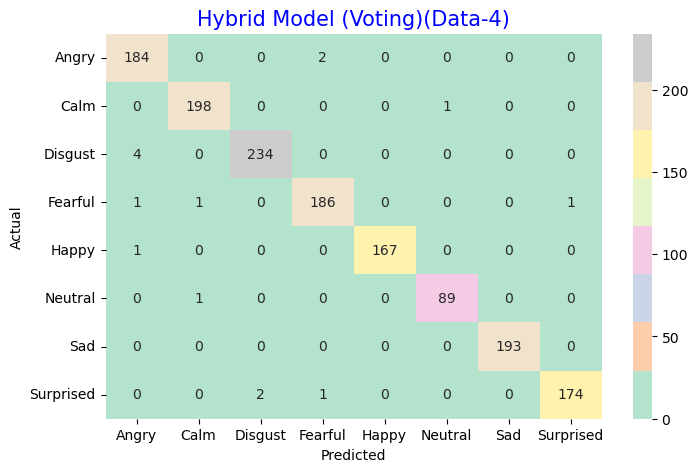

Classification Report for Hybrid Model (Voting) (Data-4)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.98      0.98       189
       Happy       1.00      0.99      1.00       168
     Neutral       0.99      0.99      0.99        90
         Sad       1.00      1.00      1.00       193
   Surprised       0.99      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
Result Metrics for Data-4


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
5,Hybrid Model (Stacking),100.00,99.03,99.03,99.03,99.03
6,Hybrid Model (Voting),100.00,98.96,98.97,98.96,98.96
4,Decision Tree,100.00,98.68,98.69,98.68,98.68
2,Random Forest,97.47,95.07,95.52,95.07,95.13
0,Support Vector Classifier,84.90,77.36,77.81,77.36,77.27
3,MLP,60.59,54.44,57.53,54.44,54.42
1,Naive Bayes,31.37,30.62,33.95,30.62,29.26


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-5
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


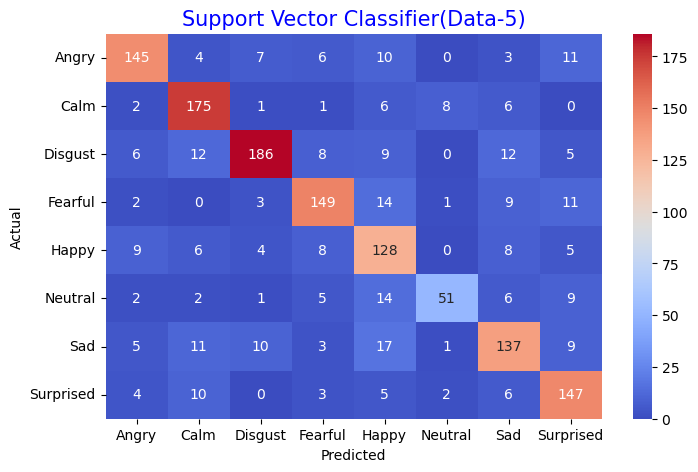

Classification Report for Support Vector Classifier (Data-5)
               precision    recall  f1-score   support

       Angry       0.83      0.78      0.80       186
        Calm       0.80      0.88      0.84       199
     Disgust       0.88      0.78      0.83       238
     Fearful       0.81      0.79      0.80       189
       Happy       0.63      0.76      0.69       168
     Neutral       0.81      0.57      0.67        90
         Sad       0.73      0.71      0.72       193
   Surprised       0.75      0.83      0.79       177

    accuracy                           0.78      1440
   macro avg       0.78      0.76      0.77      1440
weighted avg       0.78      0.78      0.78      1440

Train Accuracy: 85.26%
Test Accuracy : 77.64%
Precision : 78.29%
Recall : 77.64%
F1-Score : 77.64%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


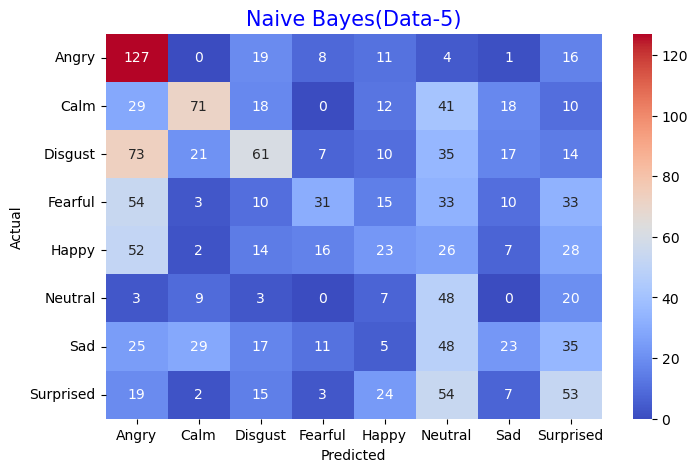

Classification Report for Naive Bayes (Data-5)
               precision    recall  f1-score   support

       Angry       0.33      0.68      0.45       186
        Calm       0.52      0.36      0.42       199
     Disgust       0.39      0.26      0.31       238
     Fearful       0.41      0.16      0.23       189
       Happy       0.21      0.14      0.17       168
     Neutral       0.17      0.53      0.25        90
         Sad       0.28      0.12      0.17       193
   Surprised       0.25      0.30      0.27       177

    accuracy                           0.30      1440
   macro avg       0.32      0.32      0.28      1440
weighted avg       0.34      0.30      0.29      1440

Train Accuracy: 32.190000000000005%
Test Accuracy : 30.349999999999998%
Precision : 33.61%
Recall : 30.349999999999998%
F1-Score : 28.939999999999998%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

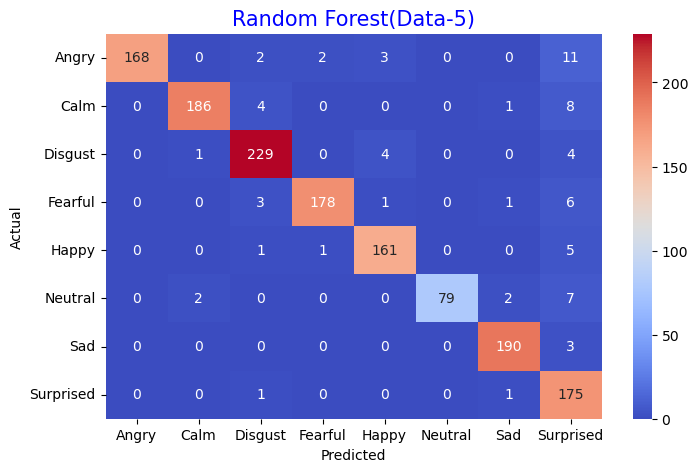

Classification Report for Random Forest (Data-5)
               precision    recall  f1-score   support

       Angry       1.00      0.90      0.95       186
        Calm       0.98      0.93      0.96       199
     Disgust       0.95      0.96      0.96       238
     Fearful       0.98      0.94      0.96       189
       Happy       0.95      0.96      0.96       168
     Neutral       1.00      0.88      0.93        90
         Sad       0.97      0.98      0.98       193
   Surprised       0.80      0.99      0.88       177

    accuracy                           0.95      1440
   macro avg       0.96      0.94      0.95      1440
weighted avg       0.95      0.95      0.95      1440

Train Accuracy: 97.47%
Test Accuracy : 94.86%
Precision : 95.44%
Recall : 94.86%
F1-Score : 94.95%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


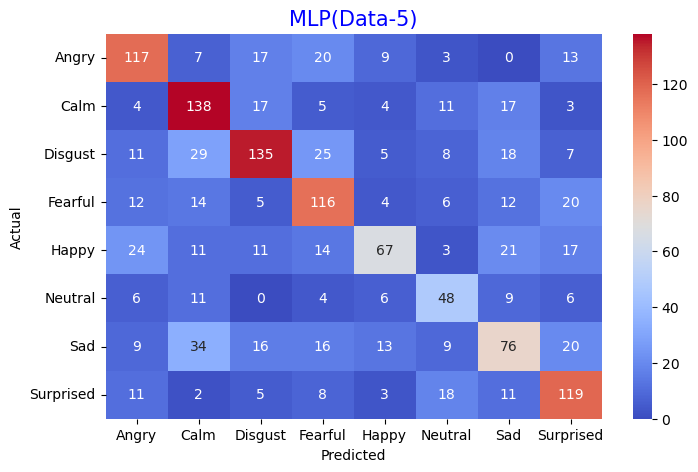

Classification Report for MLP (Data-5)
               precision    recall  f1-score   support

       Angry       0.60      0.63      0.62       186
        Calm       0.56      0.69      0.62       199
     Disgust       0.66      0.57      0.61       238
     Fearful       0.56      0.61      0.58       189
       Happy       0.60      0.40      0.48       168
     Neutral       0.45      0.53      0.49        90
         Sad       0.46      0.39      0.43       193
   Surprised       0.58      0.67      0.62       177

    accuracy                           0.57      1440
   macro avg       0.56      0.56      0.56      1440
weighted avg       0.57      0.57      0.56      1440

Train Accuracy: 65.35%
Test Accuracy : 56.67%
Precision : 56.910000000000004%
Recall : 56.67%
F1-Score : 56.279999999999994%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


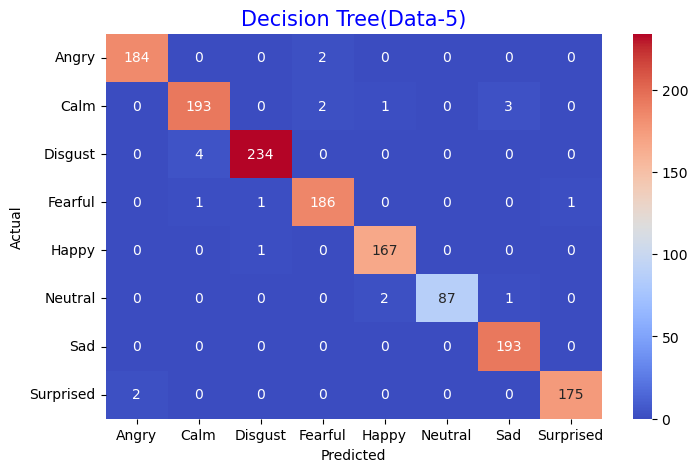

Classification Report for Decision Tree (Data-5)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.97      0.97      0.97       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.98      0.98       189
       Happy       0.98      0.99      0.99       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.99      0.99      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.98      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.54%
Precision : 98.55000000000001%
Recall : 98.54%
F1-Score : 98.54%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


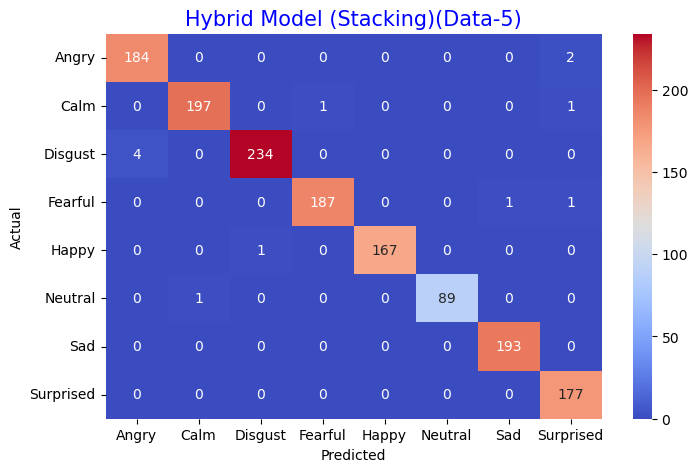

Classification Report for Hybrid Model (Stacking) (Data-5)
               precision    recall  f1-score   support

       Angry       0.98      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.99      0.99       189
       Happy       1.00      0.99      1.00       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.98      1.00      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.17%
Precision : 99.17%
Recall : 99.17%
F1-Score : 99.17%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


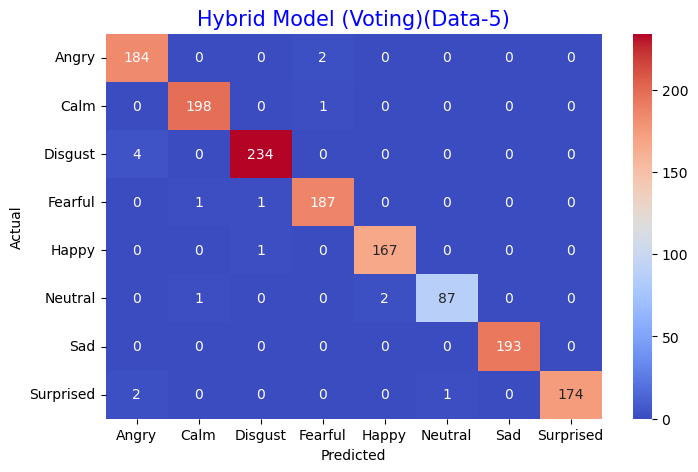

Classification Report for Hybrid Model (Voting) (Data-5)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.99      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       0.99      0.97      0.98        90
         Sad       1.00      1.00      1.00       193
   Surprised       1.00      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.89%
Precision : 98.9%
Recall : 98.89%
F1-Score : 98.89%
Result Metrics for Data-5


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
5,Hybrid Model (Stacking),100.00,99.17,99.17,99.17,99.17
6,Hybrid Model (Voting),100.00,98.89,98.90,98.89,98.89
4,Decision Tree,100.00,98.54,98.55,98.54,98.54
2,Random Forest,97.47,94.86,95.44,94.86,94.95
0,Support Vector Classifier,85.26,77.64,78.29,77.64,77.64
3,MLP,65.35,56.67,56.91,56.67,56.28
1,Naive Bayes,32.19,30.35,33.61,30.35,28.94


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-6
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


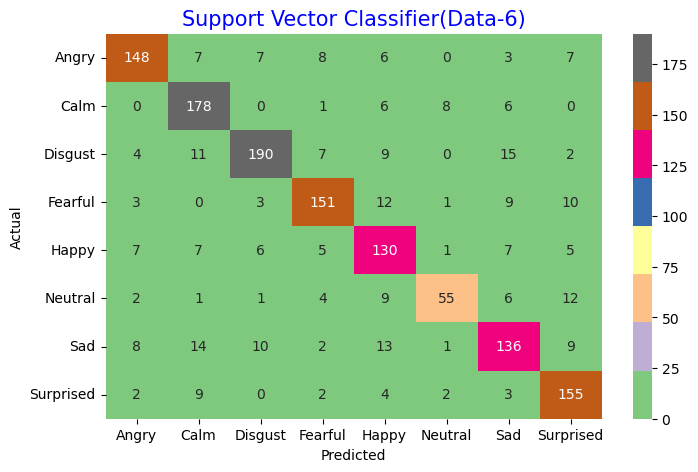

Classification Report for Support Vector Classifier (Data-6)
               precision    recall  f1-score   support

       Angry       0.85      0.80      0.82       186
        Calm       0.78      0.89      0.84       199
     Disgust       0.88      0.80      0.84       238
     Fearful       0.84      0.80      0.82       189
       Happy       0.69      0.77      0.73       168
     Neutral       0.81      0.61      0.70        90
         Sad       0.74      0.70      0.72       193
   Surprised       0.78      0.88      0.82       177

    accuracy                           0.79      1440
   macro avg       0.79      0.78      0.78      1440
weighted avg       0.80      0.79      0.79      1440

Train Accuracy: 86.48%
Test Accuracy : 79.38%
Precision : 79.75999999999999%
Recall : 79.38%
F1-Score : 79.31%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


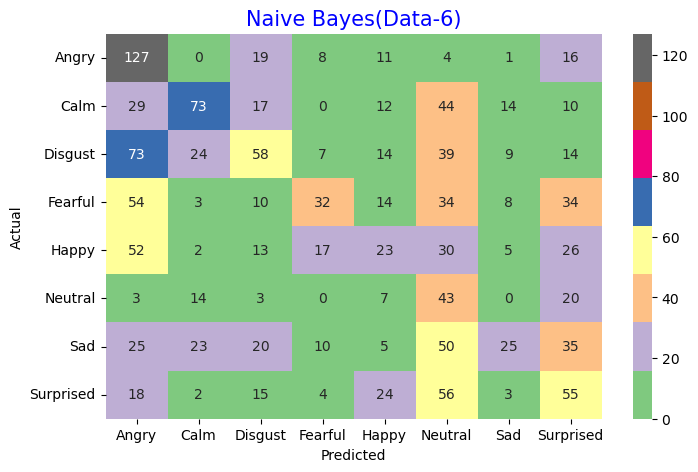

Classification Report for Naive Bayes (Data-6)
               precision    recall  f1-score   support

       Angry       0.33      0.68      0.45       186
        Calm       0.52      0.37      0.43       199
     Disgust       0.37      0.24      0.30       238
     Fearful       0.41      0.17      0.24       189
       Happy       0.21      0.14      0.17       168
     Neutral       0.14      0.48      0.22        90
         Sad       0.38      0.13      0.19       193
   Surprised       0.26      0.31      0.28       177

    accuracy                           0.30      1440
   macro avg       0.33      0.31      0.28      1440
weighted avg       0.35      0.30      0.29      1440

Train Accuracy: 32.01%
Test Accuracy : 30.28%
Precision : 34.74%
Recall : 30.28%
F1-Score : 29.14%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


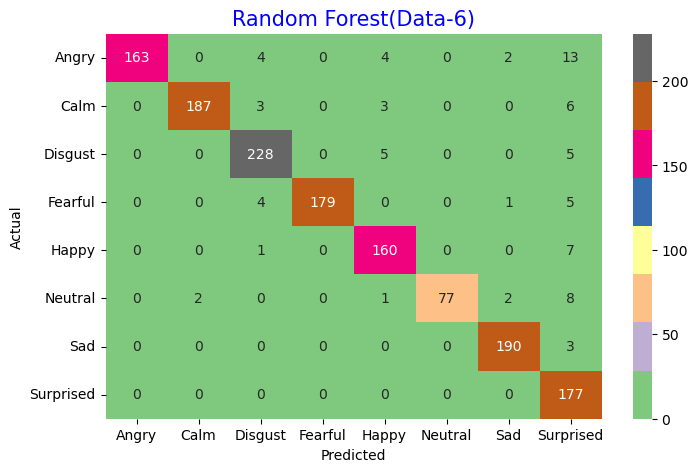

Classification Report for Random Forest (Data-6)
               precision    recall  f1-score   support

       Angry       1.00      0.88      0.93       186
        Calm       0.99      0.94      0.96       199
     Disgust       0.95      0.96      0.95       238
     Fearful       1.00      0.95      0.97       189
       Happy       0.92      0.95      0.94       168
     Neutral       1.00      0.86      0.92        90
         Sad       0.97      0.98      0.98       193
   Surprised       0.79      1.00      0.88       177

    accuracy                           0.95      1440
   macro avg       0.95      0.94      0.94      1440
weighted avg       0.95      0.95      0.95      1440

Train Accuracy: 97.24000000000001%
Test Accuracy : 94.51%
Precision : 95.23%
Recall : 94.51%
F1-Score : 94.61%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


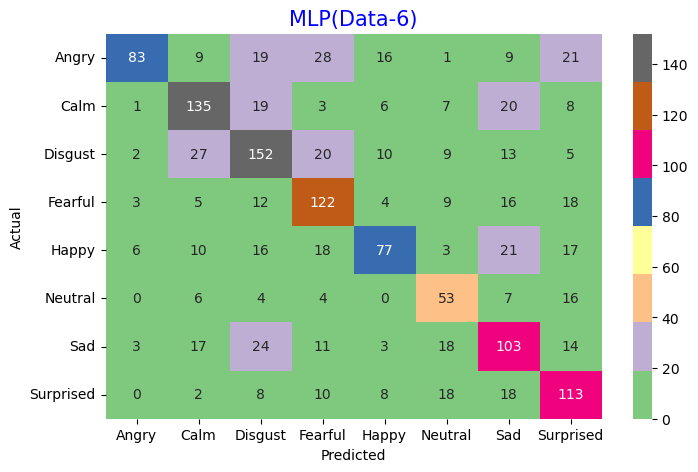

Classification Report for MLP (Data-6)
               precision    recall  f1-score   support

       Angry       0.85      0.45      0.58       186
        Calm       0.64      0.68      0.66       199
     Disgust       0.60      0.64      0.62       238
     Fearful       0.56      0.65      0.60       189
       Happy       0.62      0.46      0.53       168
     Neutral       0.45      0.59      0.51        90
         Sad       0.50      0.53      0.51       193
   Surprised       0.53      0.64      0.58       177

    accuracy                           0.58      1440
   macro avg       0.59      0.58      0.57      1440
weighted avg       0.60      0.58      0.58      1440

Train Accuracy: 66.60000000000001%
Test Accuracy : 58.19%
Precision : 60.36%
Recall : 58.19%
F1-Score : 58.15%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


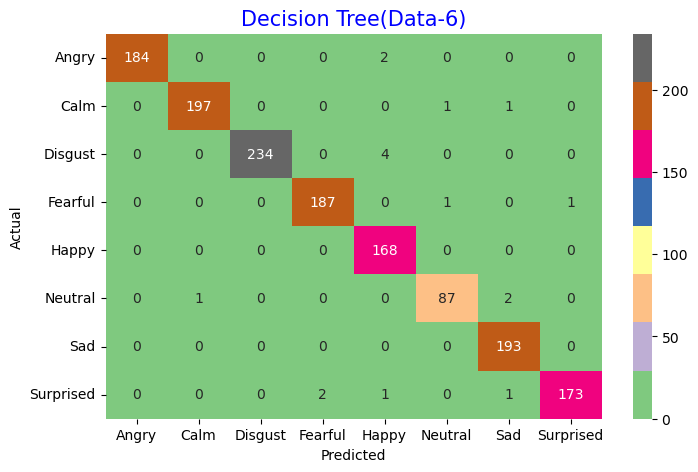

Classification Report for Decision Tree (Data-6)
               precision    recall  f1-score   support

       Angry       1.00      0.99      0.99       186
        Calm       0.99      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.99      0.99       189
       Happy       0.96      1.00      0.98       168
     Neutral       0.98      0.97      0.97        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.99      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.82%
Precision : 98.83999999999999%
Recall : 98.82%
F1-Score : 98.82%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


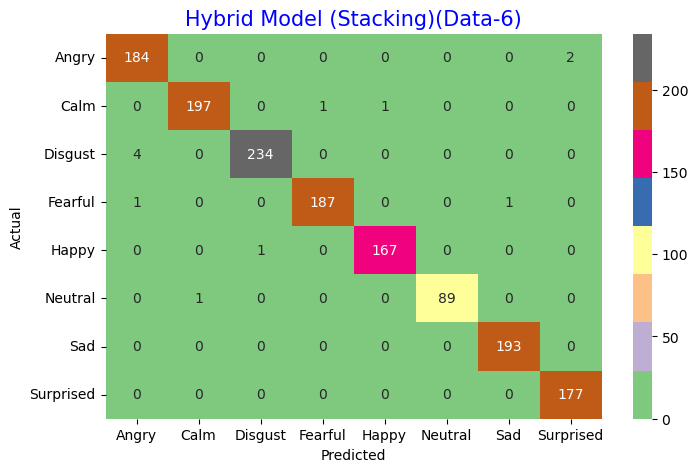

Classification Report for Hybrid Model (Stacking) (Data-6)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       0.99      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.99      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.99      1.00      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.17%
Precision : 99.17%
Recall : 99.17%
F1-Score : 99.17%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


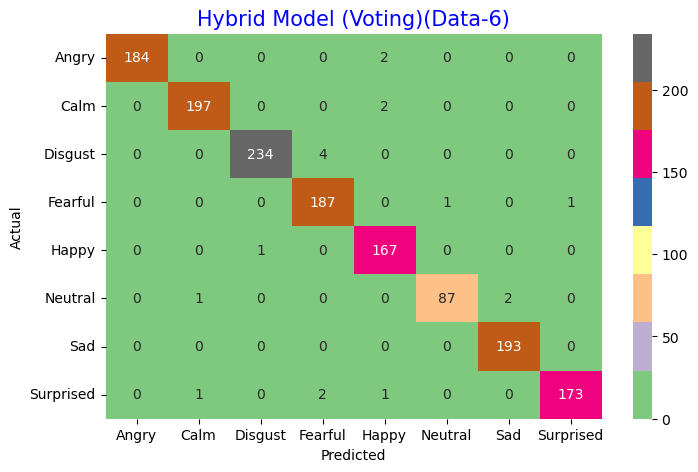

Classification Report for Hybrid Model (Voting) (Data-6)
               precision    recall  f1-score   support

       Angry       1.00      0.99      0.99       186
        Calm       0.99      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.97      0.99      0.98       189
       Happy       0.97      0.99      0.98       168
     Neutral       0.99      0.97      0.98        90
         Sad       0.99      1.00      0.99       193
   Surprised       0.99      0.98      0.99       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.75%
Precision : 98.76%
Recall : 98.75%
F1-Score : 98.75%
Result Metrics for Data-6


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
5,Hybrid Model (Stacking),100.00,99.17,99.17,99.17,99.17
4,Decision Tree,100.00,98.82,98.84,98.82,98.82
6,Hybrid Model (Voting),100.00,98.75,98.76,98.75,98.75
2,Random Forest,97.24,94.51,95.23,94.51,94.61
0,Support Vector Classifier,86.48,79.38,79.76,79.38,79.31
3,MLP,66.60,58.19,60.36,58.19,58.15
1,Naive Bayes,32.01,30.28,34.74,30.28,29.14


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-7
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


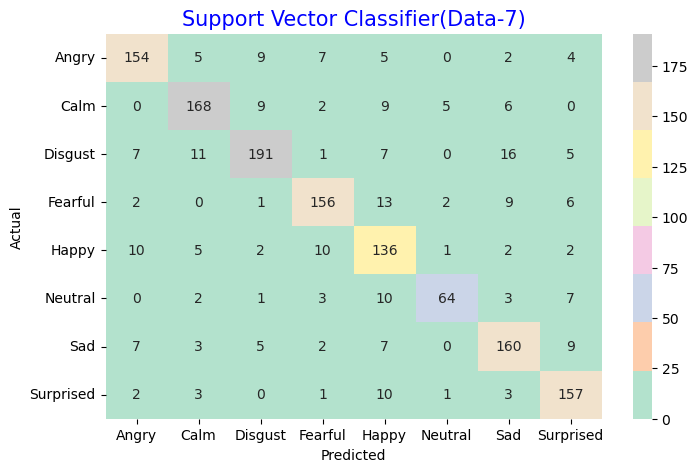

Classification Report for Support Vector Classifier (Data-7)
               precision    recall  f1-score   support

       Angry       0.85      0.83      0.84       186
        Calm       0.85      0.84      0.85       199
     Disgust       0.88      0.80      0.84       238
     Fearful       0.86      0.83      0.84       189
       Happy       0.69      0.81      0.75       168
     Neutral       0.88      0.71      0.79        90
         Sad       0.80      0.83      0.81       193
   Surprised       0.83      0.89      0.86       177

    accuracy                           0.82      1440
   macro avg       0.83      0.82      0.82      1440
weighted avg       0.83      0.82      0.82      1440

Train Accuracy: 89.57000000000001%
Test Accuracy : 82.36%
Precision : 82.8%
Recall : 82.36%
F1-Score : 82.42%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


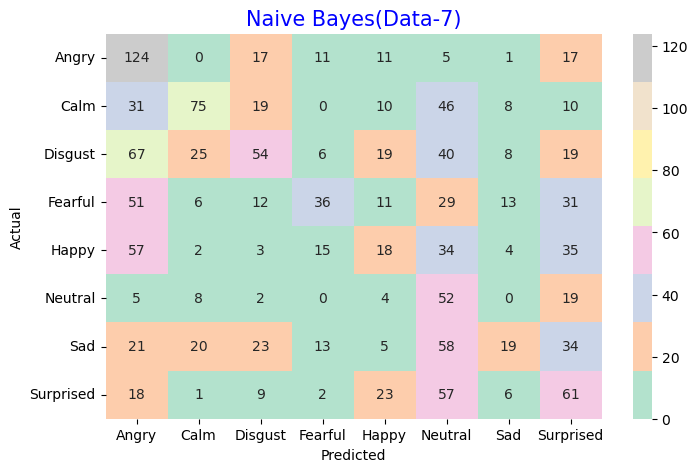

Classification Report for Naive Bayes (Data-7)
               precision    recall  f1-score   support

       Angry       0.33      0.67      0.44       186
        Calm       0.55      0.38      0.45       199
     Disgust       0.39      0.23      0.29       238
     Fearful       0.43      0.19      0.26       189
       Happy       0.18      0.11      0.13       168
     Neutral       0.16      0.58      0.25        90
         Sad       0.32      0.10      0.15       193
   Surprised       0.27      0.34      0.30       177

    accuracy                           0.30      1440
   macro avg       0.33      0.32      0.29      1440
weighted avg       0.35      0.30      0.29      1440

Train Accuracy: 32.12%
Test Accuracy : 30.490000000000002%
Precision : 34.69%
Recall : 30.490000000000002%
F1-Score : 28.98%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


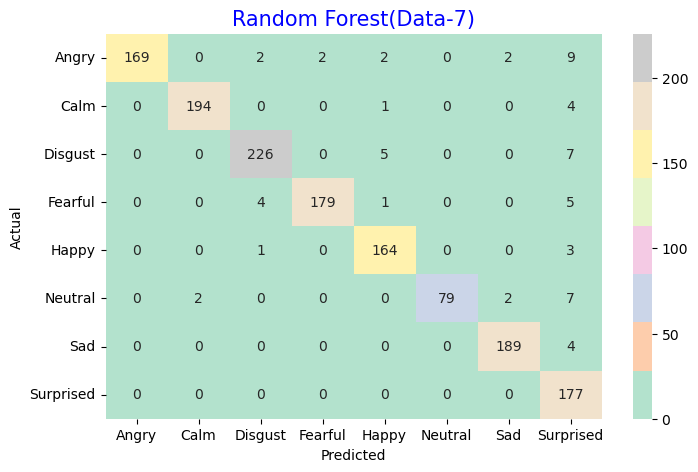

Classification Report for Random Forest (Data-7)
               precision    recall  f1-score   support

       Angry       1.00      0.91      0.95       186
        Calm       0.99      0.97      0.98       199
     Disgust       0.97      0.95      0.96       238
     Fearful       0.99      0.95      0.97       189
       Happy       0.95      0.98      0.96       168
     Neutral       1.00      0.88      0.93        90
         Sad       0.98      0.98      0.98       193
   Surprised       0.82      1.00      0.90       177

    accuracy                           0.96      1440
   macro avg       0.96      0.95      0.95      1440
weighted avg       0.96      0.96      0.96      1440

Train Accuracy: 97.69%
Test Accuracy : 95.62%
Precision : 96.11%
Recall : 95.62%
F1-Score : 95.7%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


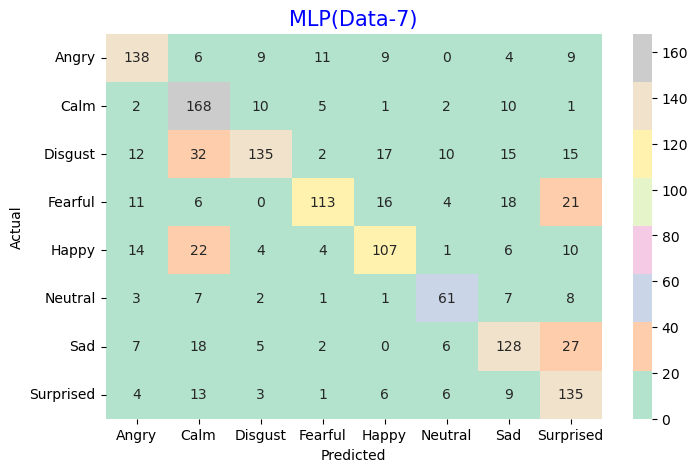

Classification Report for MLP (Data-7)
               precision    recall  f1-score   support

       Angry       0.72      0.74      0.73       186
        Calm       0.62      0.84      0.71       199
     Disgust       0.80      0.57      0.67       238
     Fearful       0.81      0.60      0.69       189
       Happy       0.68      0.64      0.66       168
     Neutral       0.68      0.68      0.68        90
         Sad       0.65      0.66      0.66       193
   Surprised       0.60      0.76      0.67       177

    accuracy                           0.68      1440
   macro avg       0.70      0.69      0.68      1440
weighted avg       0.70      0.68      0.68      1440

Train Accuracy: 77.31%
Test Accuracy : 68.4%
Precision : 70.06%
Recall : 68.4%
F1-Score : 68.30000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


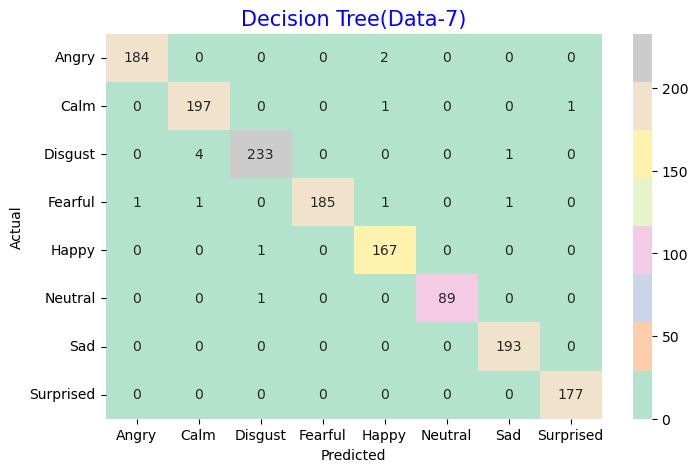

Classification Report for Decision Tree (Data-7)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.98      0.99      0.98       199
     Disgust       0.99      0.98      0.99       238
     Fearful       1.00      0.98      0.99       189
       Happy       0.98      0.99      0.99       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.99      1.00      0.99       193
   Surprised       0.99      1.00      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

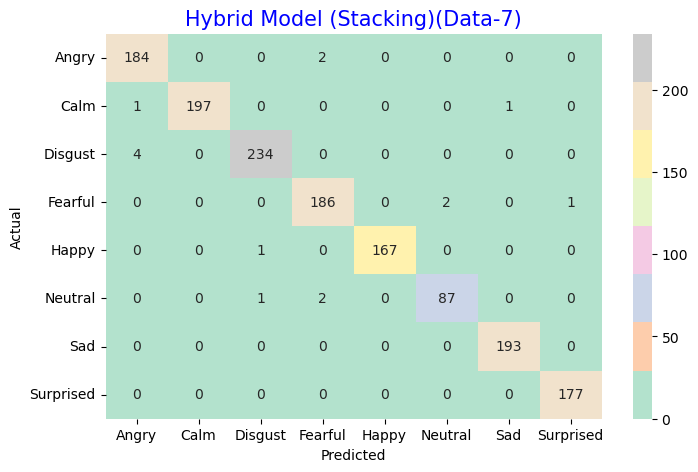

Classification Report for Hybrid Model (Stacking) (Data-7)
               precision    recall  f1-score   support

       Angry       0.97      0.99      0.98       186
        Calm       1.00      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.98      0.98       189
       Happy       1.00      0.99      1.00       168
     Neutral       0.98      0.97      0.97        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.99      1.00      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.96000000000001%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.

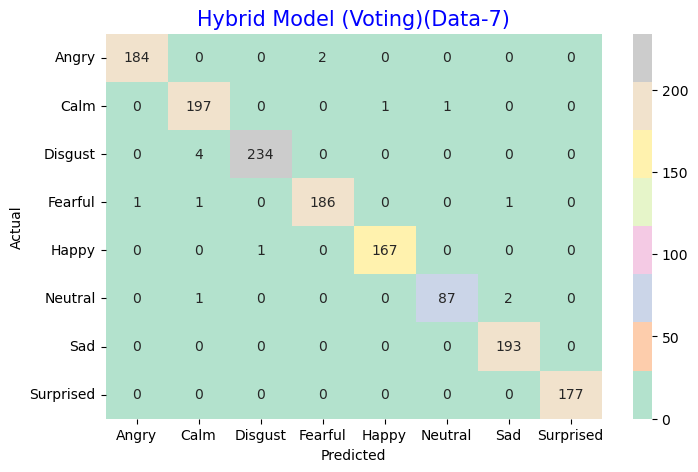

Classification Report for Hybrid Model (Voting) (Data-7)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.97      0.99      0.98       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.98      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       0.99      0.97      0.98        90
         Sad       0.98      1.00      0.99       193
   Surprised       1.00      1.00      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
Result Metrics for Data-7


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
4,Decision Tree,100.00,98.96,98.97,98.96,98.96
5,Hybrid Model (Stacking),100.00,98.96,98.96,98.96,98.96
6,Hybrid Model (Voting),100.00,98.96,98.97,98.96,98.96
2,Random Forest,97.69,95.62,96.11,95.62,95.70
0,Support Vector Classifier,89.57,82.36,82.80,82.36,82.42
3,MLP,77.31,68.40,70.06,68.40,68.30
1,Naive Bayes,32.12,30.49,34.69,30.49,28.98


=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
                          Data-8
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Support Vector Classifier
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


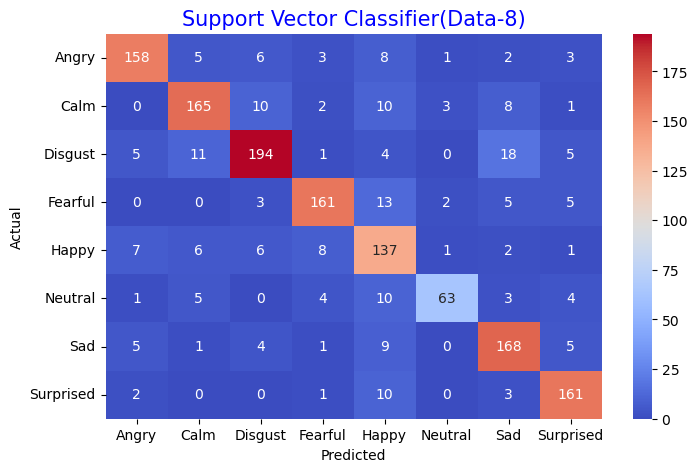

Classification Report for Support Vector Classifier (Data-8)
               precision    recall  f1-score   support

       Angry       0.89      0.85      0.87       186
        Calm       0.85      0.83      0.84       199
     Disgust       0.87      0.82      0.84       238
     Fearful       0.89      0.85      0.87       189
       Happy       0.68      0.82      0.74       168
     Neutral       0.90      0.70      0.79        90
         Sad       0.80      0.87      0.84       193
   Surprised       0.87      0.91      0.89       177

    accuracy                           0.84      1440
   macro avg       0.84      0.83      0.83      1440
weighted avg       0.84      0.84      0.84      1440

Train Accuracy: 90.64%
Test Accuracy : 83.82%
Precision : 84.38%
Recall : 83.82%
F1-Score : 83.89999999999999%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Naive Bayes
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


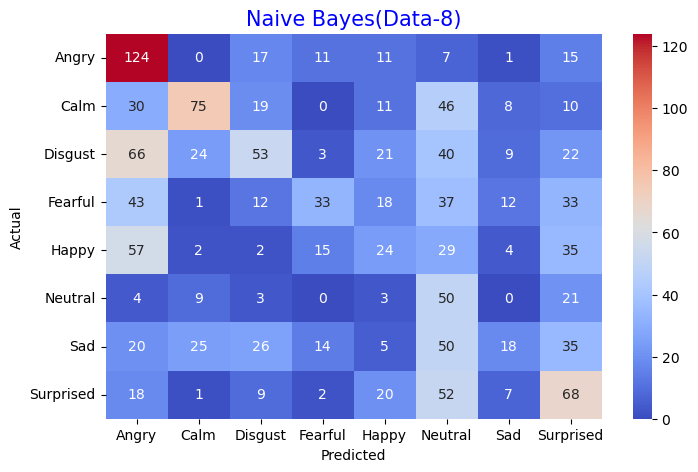

Classification Report for Naive Bayes (Data-8)
               precision    recall  f1-score   support

       Angry       0.34      0.67      0.45       186
        Calm       0.55      0.38      0.45       199
     Disgust       0.38      0.22      0.28       238
     Fearful       0.42      0.17      0.25       189
       Happy       0.21      0.14      0.17       168
     Neutral       0.16      0.56      0.25        90
         Sad       0.31      0.09      0.14       193
   Surprised       0.28      0.38      0.33       177

    accuracy                           0.31      1440
   macro avg       0.33      0.33      0.29      1440
weighted avg       0.35      0.31      0.29      1440

Train Accuracy: 32.85%
Test Accuracy : 30.9%
Precision : 34.82%
Recall : 30.9%
F1-Score : 29.37%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Random Forest
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


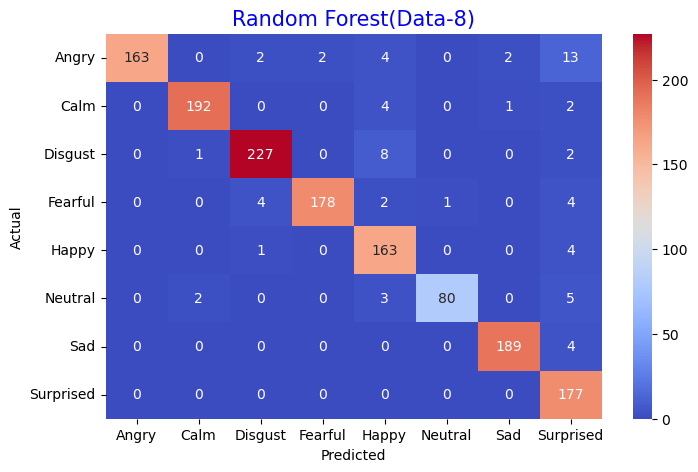

Classification Report for Random Forest (Data-8)
               precision    recall  f1-score   support

       Angry       1.00      0.88      0.93       186
        Calm       0.98      0.96      0.97       199
     Disgust       0.97      0.95      0.96       238
     Fearful       0.99      0.94      0.96       189
       Happy       0.89      0.97      0.93       168
     Neutral       0.99      0.89      0.94        90
         Sad       0.98      0.98      0.98       193
   Surprised       0.84      1.00      0.91       177

    accuracy                           0.95      1440
   macro avg       0.96      0.95      0.95      1440
weighted avg       0.96      0.95      0.95      1440

Train Accuracy: 97.07000000000001%
Test Accuracy : 95.07%
Precision : 95.55%
Recall : 95.07%
F1-Score : 95.12%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          MLP
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


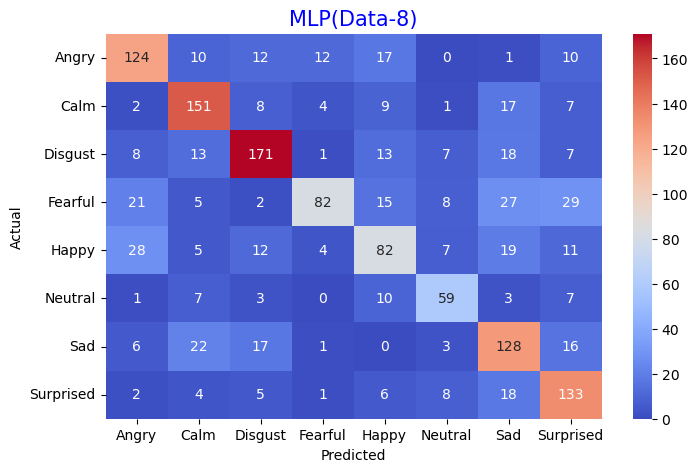

Classification Report for MLP (Data-8)
               precision    recall  f1-score   support

       Angry       0.65      0.67      0.66       186
        Calm       0.70      0.76      0.73       199
     Disgust       0.74      0.72      0.73       238
     Fearful       0.78      0.43      0.56       189
       Happy       0.54      0.49      0.51       168
     Neutral       0.63      0.66      0.64        90
         Sad       0.55      0.66      0.60       193
   Surprised       0.60      0.75      0.67       177

    accuracy                           0.65      1440
   macro avg       0.65      0.64      0.64      1440
weighted avg       0.66      0.65      0.64      1440

Train Accuracy: 71.35000000000001%
Test Accuracy : 64.58%
Precision : 65.61%
Recall : 64.58%
F1-Score : 64.24%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Decision Tree
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


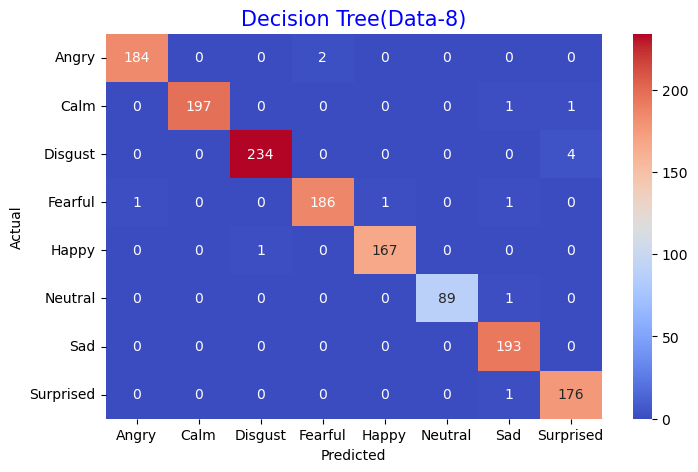

Classification Report for Decision Tree (Data-8)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       1.00      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.99      0.98      0.99       189
       Happy       0.99      0.99      0.99       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.98      1.00      0.99       193
   Surprised       0.97      0.99      0.98       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 99.03%
Precision : 99.03999999999999%
Recall : 99.03%
F1-Score : 99.03%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Stacking)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


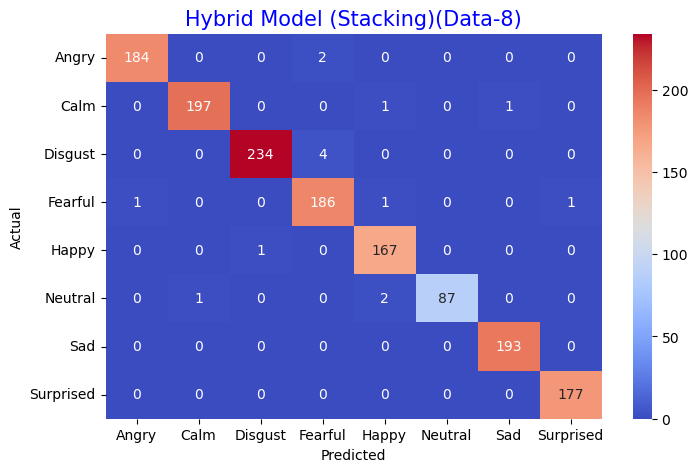

Classification Report for Hybrid Model (Stacking) (Data-8)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.99      0.99      0.99       199
     Disgust       1.00      0.98      0.99       238
     Fearful       0.97      0.98      0.98       189
       Happy       0.98      0.99      0.99       168
     Neutral       1.00      0.97      0.98        90
         Sad       0.99      1.00      1.00       193
   Surprised       0.99      1.00      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
                          Hybrid Model (Voting)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

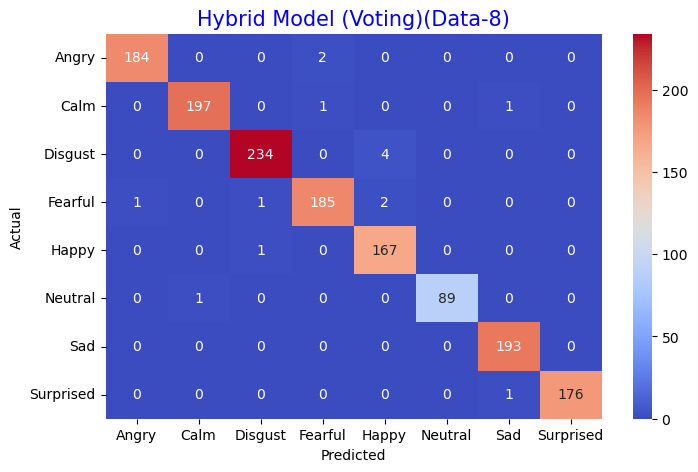

Classification Report for Hybrid Model (Voting) (Data-8)
               precision    recall  f1-score   support

       Angry       0.99      0.99      0.99       186
        Calm       0.99      0.99      0.99       199
     Disgust       0.99      0.98      0.99       238
     Fearful       0.98      0.98      0.98       189
       Happy       0.97      0.99      0.98       168
     Neutral       1.00      0.99      0.99        90
         Sad       0.99      1.00      0.99       193
   Surprised       1.00      0.99      1.00       177

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440

Train Accuracy: 100.0%
Test Accuracy : 98.96000000000001%
Precision : 98.97%
Recall : 98.96000000000001%
F1-Score : 98.96000000000001%
Result Metrics for Data-8


,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
4,Decision Tree,100.00,99.03,99.04,99.03,99.03
5,Hybrid Model (Stacking),100.00,98.96,98.97,98.96,98.96
6,Hybrid Model (Voting),100.00,98.96,98.97,98.96,98.96
2,Random Forest,97.07,95.07,95.55,95.07,95.12
0,Support Vector Classifier,90.64,83.82,84.38,83.82,83.90
3,MLP,71.35,64.58,65.61,64.58,64.24
1,Naive Bayes,32.85,30.90,34.82,30.90,29.37


In [70]:
RavSpeechMetrics=[[[],[],[],[],[]] for i in range(len(XTrSpchAll))]
denom_data=["Data-{}".format(i) for i in range(1,len(XTrSpchAll)+1)]
scheme_colrs = ['Pastel2', 'coolwarm', 'Accent', 'Pastel2', 'coolwarm', 'Accent', 'Pastel2', 'coolwarm']
frc=4
met_type="weighted"
StrDt=[]
for i in range(len(denom_data)):
    print("=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=")
    print("=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=")
    print("                          {}".format(denom_data[i]))
    print("=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=")
    print("=~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~==~=~=")
    for idx in range(len(ClfSpeech)):
        print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-")
        print("                          {}".format(NmSpeech[idx]))
        print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-")
        cr_spc_model = ClfSpeech[idx]
        cr_spc_model.fit(XTrSpchAll[i], yTrSpchAll[i])
        spch_prd=cr_spc_model.predict(XTsSpchAll[i])
        spch_prd_trn=cr_spc_model.predict(XTrSpchAll[i])
        spc_acc_trn=round(metrics.accuracy_score(yTrSpchAll[i],spch_prd_trn),frc)*100
        spc_acc_ts=round(metrics.accuracy_score(yTsSpchAll[i],spch_prd),frc)*100
        RavSpeechMetrics[i][0].append(spc_acc_trn)
        RavSpeechMetrics[i][1].append(spc_acc_ts)
        RavSpeechMetrics[i][2].append(round(metrics.precision_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100)      
        RavSpeechMetrics[i][3].append(round(metrics.recall_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100)
        RavSpeechMetrics[i][4].append(round(metrics.f1_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100)
        conmat=ps.crosstab(yTsSpchAll[i],spch_prd, rownames=['Actual'], colnames=['Predicted'], margins=True) 
        empl.figure(figsize=(8,5))
        empl.title("{}({})".format(NmSpeech[idx],denom_data[i]),fontsize=15,color="b")
        seaborn.heatmap(conmat.iloc[:8,:8],annot=True,cmap=scheme_colrs[i],fmt="d")
        empl.show()
        pr=round(metrics.precision_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100
        rc=round(metrics.recall_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100
        fs=round(metrics.f1_score(yTsSpchAll[i],spch_prd,average=met_type),frc)*100
        print("Classification Report for {} ({})\n".format(NmSpeech[idx],denom_data[i]),metrics.classification_report(yTsSpchAll[i],spch_prd))
        print("Train Accuracy: {}%".format(spc_acc_trn))
        print("Test Accuracy : {}%\nPrecision : {}%".format(spc_acc_ts,pr))
        print("Recall : {}%\nF1-Score : {}%".format(rc,fs))
    perf=ps.DataFrame({
        "Classifiers":NmSpeech,
        "Train Accuracy":RavSpeechMetrics[i][0],
        "Test Accuracy":RavSpeechMetrics[i][1],
        "Precision":RavSpeechMetrics[i][2],
        "Recall":RavSpeechMetrics[i][3],
        "F1-Score":RavSpeechMetrics[i][4]
    })
    perf=perf.sort_values(by="Test Accuracy",ascending=False)
    print("Result Metrics for {}".format(denom_data[i]))
    display(HTML(perf.to_html()))
    StrDt.append(perf)

In [123]:
StrDt[0].iloc[2:]

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
2,Decision Tree,100.00,98.54,98.56,98.54,98.54
3,Random Forest,97.73,95.07,95.45,95.07,95.09
4,Support Vector Classifier,79.11,71.32,71.88,71.32,71.24
5,MLP,56.55,50.83,50.72,50.83,50.45
6,Naive Bayes,29.91,29.17,31.12,29.17,27.70


In [103]:
OptDtRV=[]
for s in range(len(StrDt)):
        StrDt[s]=StrDt[s].reset_index(drop=True)
        opt=StrDt[s][StrDt[s]['Test Accuracy']==max(StrDt[s]['Test Accuracy'])]
        OptDtRV.append(opt)

In [104]:
optdf=ps.concat(OptDtRV).reset_index(drop=True)
optdf=optdf.drop(optdf.index[[6,8]]).reset_index(drop=True)
optdf['Sample Rate']=rateofsmp
optdf

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Sample Rate
0,Hybrid Model (Stacking),100.0,99.03,99.06,99.03,99.03,16000
1,Decision Tree,100.0,99.10,99.11,99.10,99.10,22050
2,Hybrid Model (Stacking),100.0,98.96,98.97,98.96,98.96,24000
3,Hybrid Model (Stacking),100.0,99.03,99.03,99.03,99.03,32000
4,Hybrid Model (Stacking),100.0,99.17,99.17,99.17,99.17,44100
5,Hybrid Model (Stacking),100.0,99.17,99.17,99.17,99.17,48000
6,Hybrid Model (Stacking),100.0,98.96,98.96,98.96,98.96,88200
7,Decision Tree,100.0,99.03,99.04,99.03,99.03,96000


[Text(0, 0, '98.96'),
 Text(0, 0, '98.96'),
 Text(0, 0, '99.03'),
 Text(0, 0, '99.03'),
 Text(0, 0, '99.03'),
 Text(0, 0, '99.1'),
 Text(0, 0, '99.17'),
 Text(0, 0, '99.17')]

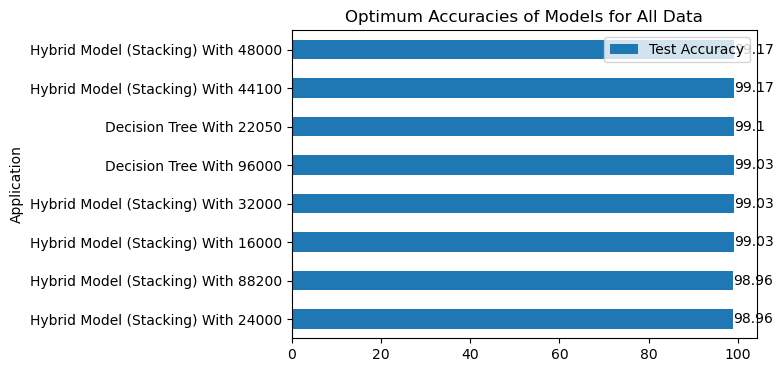

In [148]:
VzOptDf=optdf[['Test Accuracy','Sample Rate','Classifiers']]
VzOptDf['Application']=nuy.array(VzOptDf['Classifiers'])+" With "+nuy.array(VzOptDf['Sample Rate'],str)
VzOptDf=VzOptDf.drop(['Sample Rate','Classifiers'],axis=1)
VzOptDf=VzOptDf.set_index('Application')
VzOptDf=VzOptDf.sort_values(by="Test Accuracy",ascending=True)
ax = VzOptDf.plot.barh(title="Optimum Accuracies of Models for All Data", figsize=(6,4))

ax.bar_label(ax.containers[0])

In [116]:
fetsext=[95,131, 142, 189, 260, 283, 518, 564]
crdf=ps.DataFrame({
    "Features":fetsext,
    "Sample Rate":optdf["Sample Rate"].tolist(),
    "Accuracy":optdf['Test Accuracy'].tolist()
})
crdf

,Features,Sample Rate,Accuracy
0,95,16000,99.03
1,131,22050,99.10
2,142,24000,98.96
3,189,32000,99.03
4,260,44100,99.17
5,283,48000,99.17
6,518,88200,98.96
7,564,96000,99.03


In [118]:
crdf.corr()

,Features,Sample Rate,Accuracy
Features,1.000000,0.999999,-0.176829
Sample Rate,0.999999,1.000000,-0.177756
Accuracy,-0.176829,-0.177756,1.000000
